In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Data Loading



In [41]:
housePrice = pd.read_csv("Data/kc_house_data.csv")
zipcodedf = pd.read_csv("Data/usa_zipcode_of_wa.csv")

zipcodedf = zipcodedf.dropna(subset=['City'])
zipcodedf = zipcodedf.rename(columns = {"zip":"zipcode"})

zipcodedf['zipcode'] = zipcodedf['zipcode'].astype(int)
merged_zip = pd.merge(zipcodedf, housePrice, on ="zipcode")
merged_zip.head()

,zipcode,Zipcode name,City,State,County Name,id,date,price,bedrooms,bathrooms,...,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98001,"AUBURN, WA",AUBURN,WA,KING,7895500070,20150213T000000,240000.0,4,1.0,...,2,7,890,330,1969,0,47.3341,-122.282,1290,7800
1,98001,"AUBURN, WA",AUBURN,WA,KING,3717000160,20141009T000000,287000.0,4,2.5,...,3,7,2240,0,2005,0,47.3378,-122.257,2221,4557
2,98001,"AUBURN, WA",AUBURN,WA,KING,8961960160,20141028T000000,480000.0,4,2.5,...,3,9,2520,710,2001,0,47.3183,-122.253,2640,8517
3,98001,"AUBURN, WA",AUBURN,WA,KING,4014400292,20150114T000000,465000.0,3,2.5,...,3,9,2714,0,2005,0,47.3185,-122.275,2590,18386
4,98001,"AUBURN, WA",AUBURN,WA,KING,1115450240,20141022T000000,360000.0,4,2.5,...,3,9,2160,0,1992,0,47.3341,-122.255,2280,9937


In [38]:
merged_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   zipcode        21613 non-null  int64  
 1   Zipcode name   21613 non-null  object 
 2   City           21613 non-null  object 
 3   State          21613 non-null  object 
 4   County Name    21613 non-null  object 
 5   id             21613 non-null  int64  
 6   date           21613 non-null  object 
 7   price          21613 non-null  float64
 8   bedrooms       21613 non-null  int64  
 9   bathrooms      21613 non-null  float64
 10  sqft_living    21613 non-null  int64  
 11  sqft_lot       21613 non-null  int64  
 12  floors         21613 non-null  float64
 13  waterfront     21613 non-null  int64  
 14  view           21613 non-null  int64  
 15  condition      21613 non-null  int64  
 16  grade          21613 non-null  int64  
 17  sqft_above     21613 non-null  int64  
 18  sqft_b

### Data Visualization



In [58]:
fig1 = px.imshow(merged_zip.corr(), title="Heat Map")
fig1.update_layout(
    autosize=False,
    width=800,
    height=800)
fig1.show()

Interpretation:

The heat map above measures the correlation between each variable from the data set. 

Here are some examples:

- Square feet above and square feet living have a strong correlation of 88%
- Square feet lot \(15\) and price has a weak correlation of 8%



In [54]:
fig1 = px.scatter(merged_zip, x="price", y="sqft_living",facet_col="view", color = "condition", title="Square Feet Living, View, Condition, and Price")
fig1.update_layout(
    autosize=False,
    width=1000,
    height=600)
fig1.show()

Interpretation:

The scatterplots above measure the relation of price and square feet living. It is divided between views \(four being a nicer view than one\). The color of each dot represents the condition of each respective house \(one being the worst condition and five being the best\).

Here are some examples:

- The most expensive house in view four costs 2.28 million dollars, and it is in okay condition.
- The least expensive house in view 0 costs 142 thousand dollars, and it is in bad condition.



In [50]:
fig1 = px.scatter(merged_zip, x="price", y="sqft_above", color = "City", title="Price and Square Feet Above")
fig1.update_layout(
    autosize=False,
    width=1000,
    height=600)
fig1.show()

Interpretation:

The scatterplot above measures the relation of price and square feet above in each city.  

Here is one example:

- A house in Mercer Island is 5,000 square feet above and costs 5.3 million dollars



In [49]:
boxplot = px.box(merged_zip, y="price", x="City", title="Price and City")
boxplot.update_layout(
    autosize=False,
    width=1500,
    height=600)
boxplot.show()

Interpretation:

The box plot above measures the overall of price of houses in each city. 

Here is one example:

- A house in Medina City has more of a chance of being more expensive than a house in Maple Valley.



In [59]:
boxplot = px.box(merged_zip, x="grade", y="price", title="Price and Bathrooms")
boxplot.update_layout(
    autosize=False,
    width=1500,
    height=600)
boxplot.show()

Interpretation:

The box plot above compares the overall price of houses to its grade. 

Here is one example:

- A house with grade of thirteen will be more expensive than a house with a grade of five.



In [51]:
fig = px.scatter(merged_zip, x="sqft_living", y="price",
                 size="sqft_above", color="City", log_x=True, size_max=30, title="Cost Factors")
fig.show()

Interpretation:

The bubble chart above shoes the relationship between a multitude of cost factors.

Here is one example:

- A house with less total square feet will cost less. Since the entire house has less square feet, the upper floor also has less square feet, which is why the bubbles are smaller closer to the origin.



In [53]:
fig = px.pie(merged_zip, values='price', names='bedrooms', title= "Bedrooms vs House Price", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Interpretation:

The pie chart above compares the overall price of houses to the number of bedrooms. The outliers in this case affect the chart.

Here is one example: A house with two bedrooms may cost 1 billion dollars. 


### Data Cleaning



In [11]:
# Drop not useful columns
merged_zip = merged_zip.drop(['zipcode', 'Zipcode name', 'id', 'State', 'lat', 'long', 'County Name'], axis = 1)
# convert date into datetime and split year, month, and day from it
merged_zip['date'] = pd.to_datetime(merged_zip['date'])
merged_zip['year'] = merged_zip['date'].dt.year
merged_zip['month'] = merged_zip['date'].dt.month

# calculate house age starting from the year that the house was sold
merged_zip = merged_zip.drop(["date"],axis = 1)
merged_zip['yr_age'] = abs(merged_zip['year'] - merged_zip["yr_built"])

# use 0 and 1 to represent whether the house is renewed or not
merged_zip['renovation'] = np.where(merged_zip['yr_renovated']==0,0,1)
merged_zip.drop(['yr_renovated'], inplace=True, axis=1)
print(merged_zip['renovation'].value_counts())

# convert City column into numeric feature by adding dummy variables
merged_zip = pd.concat([merged_zip,pd.get_dummies(merged_zip["City"],prefix = "city")],axis = 1)  
merged_zip = merged_zip.drop(["City"], axis = 1)
merged_zip.head()

0    20699
1      914
Name: renovation, dtype: int64


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,city_MEDINA,city_MERCER ISLAND,city_NORTH BEND,city_REDMOND,city_RENTON,city_SAMMAMISH,city_SEATTLE,city_SNOQUALMIE,city_VASHON,city_WOODINVILLE
0,240000.0,4,1.0,1220,8075,1.0,0,0,2,7,...,0,0,0,0,0,0,0,0,0,0
1,287000.0,4,2.5,2240,4648,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,480000.0,4,2.5,3230,16171,2.0,0,3,3,9,...,0,0,0,0,0,0,0,0,0,0
3,465000.0,3,2.5,2714,17936,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0
4,360000.0,4,2.5,2160,9528,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# remove outliers
merged_zip = merged_zip[merged_zip['price'] < 2e6] 

### Data Modeling



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.preprocessing import MinMaxScaler

In [14]:
# get features as X and response as y
X = merged_zip.drop(["price"], axis = 1)
y = merged_zip["price"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Linear Regression with Polynomial features



In [28]:
# fit linear regression first
# finding what the score is before adding polynomial features
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_predict = linreg.predict(x_test)

print(mean_absolute_error(y_predict, y_test))
print(r2_score(y_predict, y_test))

101547.01851195698
0.6621681721904686


In [16]:
# fit linear regression model by adding polynomial features
# polynomial features broughter a much greater score
poly_reg=PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.transform(x_test)

lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y_train)

y_hat2 = lin_reg2.predict(x_test_poly)
print(lin_reg2.score(x_test_poly, y_test))
print(mean_absolute_error(y_hat2, y_test))

0.8070369067899824
84804.08421056102


In [29]:
# grid search for best degree in polynomial features
# finding the optimal parameters
pipe = make_pipeline(PolynomialFeatures(),LinearRegression())

params = {'polynomialfeatures__degree':[2,1]}

search = GridSearchCV(estimator = pipe, param_grid = params, scoring = "neg_mean_absolute_error",verbose=1) 

search.fit(x_train, y_train)

print(search.best_params_)
print(r2_score(y_test, search.predict(x_test)))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'polynomialfeatures__degree': 2}
0.8070369067899824


#### Decision Tree



In [18]:
# Fit the regressor data
regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X, y, cv=10)

regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [19]:
# set parameters
regressor = DecisionTreeRegressor(random_state=0)

parameters={"splitter":["best","random"],
            "max_depth" : [None,1,3,5,7],
           "min_samples_leaf":[1,2,3],
           "min_weight_fraction_leaf":[0,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30,40] }

tuning_model = GridSearchCV(regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=1)

tuning_model.fit(x_train, y_train)
print(tuning_model.best_params_)
Price = tuning_model.predict(x_test)
print(r2_score(y_test,Price))

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


{'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0, 'splitter': 'random'}
0.6957310260651683


In [20]:
# update parameters
update_regressor = DecisionTreeRegressor(random_state=0, max_features = 'auto', min_samples_leaf = 3, min_weight_fraction_leaf = 0, splitter = 'random')
update_regressor.fit(x_train, y_train)
# Assign variable to the update_regressor
Price = update_regressor.predict(x_test)

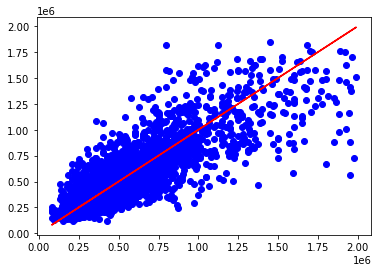

In [21]:
# predictions vs. actual data
plt.scatter(y_test,Price, color="b")
plt.plot(y_test,y_test, color="r")

In [22]:
# Found mean
# Calculated the score
MEA= np.mean(abs(y_test - Price))
score = r2_score(y_test,Price)
print("mean absolute error is:", MEA)
print("score is:", score)

mean absolute error is: 103547.25981537561
score is: 0.6957310260651683


#### Neural Network



In [23]:
scaler = MinMaxScaler()
# fit the scaler and scale training data 
X_train= scaler.fit_transform(x_train)
# scale the test data 
X_test = scaler.transform(x_test)

In [24]:
model = Sequential()
model.add(Input(shape=(42,)))
model.add(Dense(100,activation = "relu"))   # relu - limiting output between 0 and max
model.add(Dense(250,activation = "relu"))
model.add(Dense(200,activation = "relu"))
model.add(Dense(100,activation = "relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss= "mae")
model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs = 200,batch_size =128 )

2022-06-17 13:31:05.048008: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-17 13:31:05.049284: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-17 13:31:05.050259: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-06-17 13:31:05.201333: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-17 13:31:05.210486: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499990000 Hz


Epoch 1/200


  1/134 [..............................] - ETA: 1:50 - loss: 540426.6250

 13/134 [=>............................] - ETA: 0s - loss: 514759.1178  

 26/134 [====>.........................] - ETA: 0s - loss: 516484.5132

 42/134 [========>.....................] - ETA: 0s - loss: 515705.4249

 53/134 [==========>...................] - ETA: 0s - loss: 516026.6238

 64/134 [=============>................] - ETA: 0s - loss: 516378.5449

 73/134 [===============>..............] - ETA: 0s - loss: 516469.7598

 86/134 [==================>...........] - ETA: 0s - loss: 516107.0563

 99/134 [=====================>........] - ETA: 0s - loss: 515083.6203

113/134 [========================>.....] - ETA: 0s - loss: 512757.0788

123/134 [==========================>...] - ETA: 0s - loss: 509813.5856

134/134 [==============================] - ETA: 0s - loss: 505288.1124

134/134 [==============================] - 2s 8ms/step - loss: 504839.6551 - val_loss: 181859.2656


Epoch 2/200
  1/134 [..............................] - ETA: 0s - loss: 196887.4688

 13/134 [=>............................] - ETA: 0s - loss: 182774.7957

 27/134 [=====>........................] - ETA: 0s - loss: 178939.1522

 40/134 [=======>......................] - ETA: 0s - loss: 176912.3402

 52/134 [==========>...................] - ETA: 0s - loss: 174864.8224

 65/134 [=============>................] - ETA: 0s - loss: 173067.7111

 78/134 [================>.............] - ETA: 0s - loss: 171721.5182

 83/134 [=================>............] - ETA: 0s - loss: 171285.9445

 97/134 [====================>.........] - ETA: 0s - loss: 170008.4286

107/134 [======================>.......] - ETA: 0s - loss: 169154.7598

109/134 [=======================>......] - ETA: 0s - loss: 168992.6554

117/134 [=========================>....] - ETA: 0s - loss: 168340.2468

130/134 [============================>.] - ETA: 0s - loss: 167332.2934

134/134 [==============================] - 1s 6ms/step - loss: 166957.6035 - val_loss: 142083.2656


Epoch 3/200
  1/134 [..............................] - ETA: 2s - loss: 148032.7188

 11/134 [=>............................] - ETA: 0s - loss: 137486.9261

 23/134 [====>.........................] - ETA: 0s - loss: 135573.6162

 34/134 [======>.......................] - ETA: 0s - loss: 134965.5519

 42/134 [========>.....................] - ETA: 0s - loss: 134798.6533

 54/134 [===========>..................] - ETA: 0s - loss: 134572.9916

 65/134 [=============>................] - ETA: 0s - loss: 134437.0478

 78/134 [================>.............] - ETA: 0s - loss: 134143.5699

 79/134 [================>.............] - ETA: 0s - loss: 134115.6881

 82/134 [=================>............] - ETA: 0s - loss: 134030.2189

 88/134 [==================>...........] - ETA: 0s - loss: 133840.4980

 96/134 [====================>.........] - ETA: 0s - loss: 133573.7904

103/134 [======================>.......] - ETA: 0s - loss: 133340.0941

114/134 [========================>.....] - ETA: 0s - loss: 132963.8993

127/134 [===========================>..] - ETA: 0s - loss: 132506.4657

134/134 [==============================] - 1s 7ms/step - loss: 132204.1971 - val_loss: 116216.9453


Epoch 4/200


  1/134 [..............................] - ETA: 3s - loss: 128912.9375

 11/134 [=>............................] - ETA: 0s - loss: 118627.0014

 28/134 [=====>........................] - ETA: 0s - loss: 114792.7980

 39/134 [=======>......................] - ETA: 0s - loss: 114249.1190

 53/134 [==========>...................] - ETA: 0s - loss: 113865.2751

 69/134 [==============>...............] - ETA: 0s - loss: 113441.1848

 82/134 [=================>............] - ETA: 0s - loss: 113068.5424

 91/134 [===================>..........] - ETA: 0s - loss: 112821.1404

103/134 [======================>.......] - ETA: 0s - loss: 112603.6135

114/134 [========================>.....] - ETA: 0s - loss: 112511.2261

127/134 [===========================>..] - ETA: 0s - loss: 112391.3072

134/134 [==============================] - 1s 5ms/step - loss: 112312.6206 - val_loss: 108639.7188


Epoch 5/200


  1/134 [..............................] - ETA: 1s - loss: 112573.1094



 15/134 [==>...........................] - ETA: 0s - loss: 103751.4135

 22/134 [===>..........................] - ETA: 0s - loss: 103836.8221

 34/134 [======>.......................] - ETA: 0s - loss: 103643.3578

 48/134 [=========>....................] - ETA: 0s - loss: 103892.5122

 60/134 [============>.................] - ETA: 0s - loss: 104413.4673

 77/134 [================>.............] - ETA: 0s - loss: 104922.7900

 80/134 [================>.............] - ETA: 0s - loss: 104989.7357

 86/134 [==================>...........] - ETA: 0s - loss: 105105.4744

100/134 [=====================>........] - ETA: 0s - loss: 105312.7657

114/134 [========================>.....] - ETA: 0s - loss: 105380.8257

126/134 [===========================>..] - ETA: 0s - loss: 105399.7937

134/134 [==============================] - 1s 6ms/step - loss: 105419.1485 - val_loss: 105109.1641


Epoch 6/200
  1/134 [..............................] - ETA: 2s - loss: 96583.6719

 12/134 [=>............................] - ETA: 0s - loss: 106140.6061

 23/134 [====>.........................] - ETA: 0s - loss: 104268.6515

 40/134 [=======>......................] - ETA: 0s - loss: 103538.7330

 52/134 [==========>...................] - ETA: 0s - loss: 103082.9599

 62/134 [============>.................] - ETA: 0s - loss: 102785.1370

 73/134 [===============>..............] - ETA: 0s - loss: 102596.3606

 82/134 [=================>............] - ETA: 0s - loss: 102451.7170

 94/134 [====================>.........] - ETA: 0s - loss: 102319.0328

104/134 [======================>.......] - ETA: 0s - loss: 102268.9029

116/134 [========================>.....] - ETA: 0s - loss: 102229.2035

126/134 [===========================>..] - ETA: 0s - loss: 102196.7209



134/134 [==============================] - 1s 6ms/step - loss: 102208.9082 - val_loss: 102300.7812


Epoch 7/200
  1/134 [..............................] - ETA: 0s - loss: 89569.1797

 12/134 [=>............................] - ETA: 0s - loss: 98276.1289

 26/134 [====>.........................] - ETA: 0s - loss: 100447.5853

 42/134 [========>.....................] - ETA: 0s - loss: 101055.7124

 55/134 [===========>..................] - ETA: 0s - loss: 101301.3774

 68/134 [==============>...............] - ETA: 0s - loss: 101372.7721

 79/134 [================>.............] - ETA: 0s - loss: 101360.5067

 90/134 [===================>..........] - ETA: 0s - loss: 101322.8475

102/134 [=====================>........] - ETA: 0s - loss: 101226.3717

108/134 [=======================>......] - ETA: 0s - loss: 101180.6849

121/134 [==========================>...] - ETA: 0s - loss: 101106.8349

134/134 [==============================] - 1s 6ms/step - loss: 101034.4583 - val_loss: 100242.3672


Epoch 8/200
  1/134 [..............................] - ETA: 3s - loss: 91621.6562

  8/134 [>.............................] - ETA: 0s - loss: 96182.4375

 25/134 [====>.........................] - ETA: 0s - loss: 97832.4872

 38/134 [=======>......................] - ETA: 0s - loss: 98104.8518

 53/134 [==========>...................] - ETA: 0s - loss: 98541.2696

 68/134 [==============>...............] - ETA: 0s - loss: 98743.0686

 83/134 [=================>............] - ETA: 0s - loss: 98843.9134

 98/134 [====================>.........] - ETA: 0s - loss: 98920.4249

108/134 [=======================>......] - ETA: 0s - loss: 98989.6953

121/134 [==========================>...] - ETA: 0s - loss: 99059.3220

131/134 [============================>.] - ETA: 0s - loss: 99064.2699

134/134 [==============================] - 1s 5ms/step - loss: 99057.5497 - val_loss: 98761.0625


Epoch 9/200
  1/134 [..............................]

 - ETA: 0s - loss: 97959.6094

 15/134 [==>...........................] - ETA: 0s - loss: 97158.7010

 25/134 [====>.........................] - ETA: 0s - loss: 96655.0631

 38/134 [=======>......................] - ETA: 0s - loss: 96635.8388

 50/134 [==========>...................] - ETA: 0s - loss: 96598.9709

 61/134 [============>.................] - ETA: 0s - loss: 96512.1247

 77/134 [================>.............] - ETA: 0s - loss: 96463.3104

 91/134 [===================>..........] - ETA: 0s - loss: 96442.2383

105/134 [======================>.......] - ETA: 0s - loss: 96527.7797

119/134 [=========================>....] - ETA: 0s - loss: 96639.4500

130/134 [============================>.] - ETA: 0s - loss: 96683.8507

134/134 [==============================] - 1s 5ms/step - loss: 96695.3218 - val_loss: 97222.2578


Epoch 10/200
  1/134 [..............................] - ETA: 0s - loss: 91033.4688

 13/134 [=>............................] - ETA: 0s - loss: 91160.1124

 23/134 [====>.........................] - ETA: 0s - loss: 92729.0808

 33/134 [======>.......................] - ETA: 0s - loss: 93538.4936

 45/134 [=========>....................] - ETA: 0s - loss: 94067.9460

 57/134 [===========>..................] - ETA: 0s - loss: 94484.3613

 68/134 [==============>...............] - ETA: 0s - loss: 94792.0456

 79/134 [================>.............] - ETA: 0s - loss: 94965.0504

 96/134 [====================>.........] - ETA: 0s - loss: 95120.1911

107/134 [======================>.......] - ETA: 0s - loss: 95193.9913

118/134 [=========================>....] - ETA: 0s - loss: 95272.8658

123/134 [==========================>...] - ETA: 0s - loss: 95303.7992

130/134 [============================>.] - ETA: 0s - loss: 95340.9737

134/134 [==============================] - 1s 7ms/step - loss: 95355.7584 - val_loss: 96478.6250


Epoch 11/200
  1/134 [..............................] - ETA: 2s - loss: 94439.6953

  9/134 [=>............................] - ETA: 0s - loss: 91080.9097

 22/134 [===>..........................] - ETA: 0s - loss: 92842.7507

 35/134 [======>.......................] - ETA: 0s - loss: 93594.6444

 50/134 [==========>...................] - ETA: 0s - loss: 93991.6788

 64/134 [=============>................] - ETA: 0s - loss: 94113.6390

 79/134 [================>.............] - ETA: 0s - loss: 94243.8576

 91/134 [===================>..........] - ETA: 0s - loss: 94291.5309

103/134 [======================>.......] - ETA: 0s - loss: 94332.5368

109/134 [=======================>......] - ETA: 0s - loss: 94341.9489

121/134 [==========================>...] - ETA: 0s - loss: 94342.9320

124/134 [==========================>...] - ETA: 0s - loss: 94340.3233

129/134 [===========================>..] - ETA: 0s - loss: 94337.3677

133/134 [============================>.] - ETA: 0s - loss: 94335.9002

134/134 [==============================] - 1s 7ms/step - loss: 94335.9034 - val_loss: 95465.2109


Epoch 12/200
  1/134 [..............................] - ETA: 2s - loss: 96141.8906

 18/134 [===>..........................] - ETA: 0s - loss: 94870.5686

 32/134 [======>.......................] - ETA: 0s - loss: 94758.1721

 46/134 [=========>....................] - ETA: 0s - loss: 95001.2561

 54/134 [===========>..................] - ETA: 0s - loss: 95089.9410

 74/134 [===============>..............] - ETA: 0s - loss: 95038.7845

 84/134 [=================>............] - ETA: 0s - loss: 94950.1513

101/134 [=====================>........] - ETA: 0s - loss: 94784.9587

113/134 [========================>.....] - ETA: 0s - loss: 94635.5963

126/134 [===========================>..] - ETA: 0s - loss: 94475.3787

134/134 [==============================] - 1s 5ms/step - loss: 94393.2062 - val_loss: 93914.0078


Epoch 13/200


  1/134 [..............................] - ETA: 1s - loss: 86061.8438

 13/134 [=>............................] - ETA: 0s - loss: 90878.9964

 28/134 [=====>........................] - ETA: 0s - loss: 91369.0435

 41/134 [========>.....................] - ETA: 0s - loss: 91941.1117

 52/134 [==========>...................] - ETA: 0s - loss: 92218.2725

 65/134 [=============>................] - ETA: 0s - loss: 92265.1966

 80/134 [================>.............] - ETA: 0s - loss: 92188.2404

 93/134 [===================>..........] - ETA: 0s - loss: 92145.6142

106/134 [======================>.......] - ETA: 0s - loss: 92164.7973

118/134 [=========================>....] - ETA: 0s - loss: 92196.0610

126/134 [===========================>..] - ETA: 0s - loss: 92209.9457

134/134 [==============================] - 1s 5ms/step - loss: 92228.1949 - val_loss: 93861.0156


Epoch 14/200
  1/134 [..............................] - ETA: 1s - loss: 93335.8984

 13/134 [=>............................] - ETA: 0s - loss: 89340.9712

 27/134 [=====>........................] - ETA: 0s - loss: 89965.4606

 42/134 [========>.....................] - ETA: 0s - loss: 90203.9522

 54/134 [===========>..................] - ETA: 0s - loss: 90238.7529

 68/134 [==============>...............] - ETA: 0s - loss: 90227.3824

 80/134 [================>.............] - ETA: 0s - loss: 90346.2020

 91/134 [===================>..........] - ETA: 0s - loss: 90435.0438

103/134 [======================>.......] - ETA: 0s - loss: 90513.9394

116/134 [========================>.....] - ETA: 0s - loss: 90563.6846

127/134 [===========================>..] - ETA: 0s - loss: 90618.6037

134/134 [==============================] - 1s 5ms/step - loss: 90661.3274 - val_loss: 92324.4219


Epoch 15/200
  1/134 [..............................] - ETA: 1s - loss: 85315.4922

 13/134 [=>............................] - ETA: 0s - loss: 90569.4237

 26/134 [====>.........................] - ETA: 0s - loss: 90701.6184

 40/134 [=======>......................] - ETA: 0s - loss: 91157.7555

 54/134 [===========>..................] - ETA: 0s - loss: 91745.5276

 65/134 [=============>................] - ETA: 0s - loss: 91864.7875

 76/134 [================>.............] - ETA: 0s - loss: 91897.8118

 86/134 [==================>...........] - ETA: 0s - loss: 91878.2416

 97/134 [====================>.........] - ETA: 0s - loss: 91838.2287

108/134 [=======================>......] - ETA: 0s - loss: 91794.4351

117/134 [=========================>....] - ETA: 0s - loss: 91725.3003

129/134 [===========================>..] - ETA: 0s - loss: 91631.0990

134/134 [==============================] - 1s 6ms/step - loss: 91590.0653 - val_loss: 91810.0469


Epoch 16/200
  1/134 [..............................] - ETA: 1s - loss: 81976.9297

  9/134 [=>............................] - ETA: 0s - loss: 85449.7630

 17/134 [==>...........................] - ETA: 0s - loss: 87628.6512

 30/134 [=====>........................] - ETA: 0s - loss: 89334.3159

 41/134 [========>.....................] - ETA: 0s - loss: 89642.0250

 55/134 [===========>..................] - ETA: 0s - loss: 89788.8751

 69/134 [==============>...............] - ETA: 0s - loss: 89947.1607

 85/134 [==================>...........] - ETA: 0s - loss: 90045.8628

100/134 [=====================>........] - ETA: 0s - loss: 90076.8077

109/134 [=======================>......] - ETA: 0s - loss: 90104.2814

119/134 [=========================>....] - ETA: 0s - loss: 90101.1287

131/134 [============================>.] - ETA: 0s - loss: 90074.7143

134/134 [==============================] - 1s 6ms/step - loss: 90067.0002 - val_loss: 91043.1328


Epoch 17/200


  1/134 [..............................] - ETA: 1s - loss: 103377.7891

 17/134 [==>...........................] - ETA: 0s - loss: 90348.3801 

 24/134 [====>.........................] - ETA: 0s - loss: 89678.3545

 32/134 [======>.......................] - ETA: 0s - loss: 89367.9519

 40/134 [=======>......................] - ETA: 0s - loss: 89194.1131

 43/134 [========>.....................] - ETA: 0s - loss: 89155.3824

 48/134 [=========>....................] - ETA: 0s - loss: 89063.0778

 52/134 [==========>...................] - ETA: 0s - loss: 89018.7978

 55/134 [===========>..................] - ETA: 0s - loss: 88991.0136

 60/134 [============>.................] - ETA: 0s - loss: 88959.1469

 71/134 [==============>...............] - ETA: 0s - loss: 88907.7504

 81/134 [=================>............] - ETA: 0s - loss: 88879.7221

 92/134 [===================>..........] - ETA: 0s - loss: 88887.1561

104/134 [======================>.......] - ETA: 0s - loss: 88919.6579

115/134 [========================>.....] - ETA: 0s - loss: 88927.6131

128/134 [===========================>..] - ETA: 0s - loss: 88925.3051

134/134 [==============================] - 1s 7ms/step - loss: 88925.0016 - val_loss: 90467.7031


Epoch 18/200
  1/134 [..............................] - ETA: 0s - loss: 88560.0781

 11/134 [=>............................] - ETA: 0s - loss: 87762.2500

 22/134 [===>..........................] - ETA: 0s - loss: 88373.4812

 32/134 [======>.......................] - ETA: 0s - loss: 88501.5686

 41/134 [========>.....................] - ETA: 0s - loss: 88556.3165

 50/134 [==========>...................] - ETA: 0s - loss: 88649.3025

 58/134 [===========>..................] - ETA: 0s - loss: 88772.3665

 65/134 [=============>................] - ETA: 0s - loss: 88820.2810

 75/134 [===============>..............] - ETA: 0s - loss: 88819.1915

 81/134 [=================>............] - ETA: 0s - loss: 88836.2609

 89/134 [==================>...........] - ETA: 0s - loss: 88846.5795

103/134 [======================>.......] - ETA: 0s - loss: 88822.1327

115/134 [========================>.....] - ETA: 0s - loss: 88809.0974

127/134 [===========================>..] - ETA: 0s - loss: 88778.3705

134/134 [==============================] - 1s 7ms/step - loss: 88753.2366 - val_loss: 89920.6016


Epoch 19/200
  1/134 [..............................] - ETA: 2s - loss: 99964.9688

 15/134 [==>...........................] - ETA: 0s - loss: 91801.3849

 26/134 [====>.........................] - ETA: 0s - loss: 90505.5712

 34/134 [======>.......................] - ETA: 0s - loss: 89981.3663

 41/134 [========>.....................] - ETA: 0s - loss: 89793.9577

 51/134 [==========>...................] - ETA: 0s - loss: 89506.3529

 61/134 [============>.................] - ETA: 0s - loss: 89216.3211

 72/134 [===============>..............] - ETA: 0s - loss: 89016.6328

 74/134 [===============>..............] - ETA: 0s - loss: 88995.2216

 84/134 [=================>............] - ETA: 0s - loss: 88900.2164

 96/134 [====================>.........] - ETA: 0s - loss: 88825.7143

107/134 [======================>.......] - ETA: 0s - loss: 88734.5471

118/134 [=========================>....] - ETA: 0s - loss: 88639.3612

129/134 [===========================>..] - ETA: 0s - loss: 88565.5951

134/134 [==============================] - 1s 6ms/step - loss: 88542.6201 - val_loss: 89910.0703


Epoch 20/200
  1/134 [..............................] - ETA: 1s - loss: 101550.0391

 13/134 [=>............................] - ETA: 0s - loss: 88943.0373 

 24/134 [====>.........................] - ETA: 0s - loss: 88209.4635

 34/134 [======>.......................] - ETA: 0s - loss: 88209.6517

 45/134 [=========>....................] - ETA: 0s - loss: 88210.5674

 56/134 [===========>..................] - ETA: 0s - loss: 88313.2790

 66/134 [=============>................] - ETA: 0s - loss: 88343.9680

 78/134 [================>.............] - ETA: 0s - loss: 88319.1005

 89/134 [==================>...........] - ETA: 0s - loss: 88289.1021

 95/134 [====================>.........] - ETA: 0s - loss: 88264.3574

104/134 [======================>.......] - ETA: 0s - loss: 88238.3375

113/134 [========================>.....] - ETA: 0s - loss: 88183.5944

127/134 [===========================>..] - ETA: 0s - loss: 88080.1686

134/134 [==============================] - 1s 7ms/step - loss: 88035.4197 - val_loss: 89058.4688


Epoch 21/200
  1/134 [..............................] - ETA: 2s - loss: 85746.6484

 11/134 [=>............................] - ETA: 0s - loss: 88578.4986

 23/134 [====>.........................] - ETA: 0s - loss: 88960.9463

 27/134 [=====>........................] - ETA: 0s - loss: 89038.0090

 31/134 [=====>........................] - ETA: 0s - loss: 89052.0423

 39/134 [=======>......................] - ETA: 0s - loss: 88960.0639

 47/134 [=========>....................] - ETA: 0s - loss: 88778.7940

 52/134 [==========>...................] - ETA: 0s - loss: 88657.0771

 61/134 [============>.................] - ETA: 0s - loss: 88487.5804

 72/134 [===============>..............] - ETA: 0s - loss: 88337.4299

 83/134 [=================>............] - ETA: 0s - loss: 88223.8449

 90/134 [===================>..........] - ETA: 0s - loss: 88166.3964

 99/134 [=====================>........] - ETA: 0s - loss: 88097.0470

105/134 [======================>.......] - ETA: 0s - loss: 88052.8976

115/134 [========================>.....] - ETA: 0s - loss: 87977.5499

124/134 [==========================>...] - ETA: 0s - loss: 87926.5253

132/134 [============================>.] - ETA: 0s - loss: 87884.7076

134/134 [==============================] - 1s 8ms/step - loss: 87870.4161 - val_loss: 88581.7578


Epoch 22/200


  1/134 [..............................] - ETA: 1s - loss: 90796.2734

 12/134 [=>............................] - ETA: 0s - loss: 87349.7780

 20/134 [===>..........................] - ETA: 0s - loss: 86630.1777

 33/134 [======>.......................] - ETA: 0s - loss: 86011.9500

 44/134 [========>.....................] - ETA: 0s - loss: 86218.1665

 61/134 [============>.................] - ETA: 0s - loss: 86661.6537

 71/134 [==============>...............] - ETA: 0s - loss: 86717.6110

 80/134 [================>.............] - ETA: 0s - loss: 86753.3322

 94/134 [====================>.........] - ETA: 0s - loss: 86722.3972

107/134 [======================>.......] - ETA: 0s - loss: 86788.1627

116/134 [========================>.....] - ETA: 0s - loss: 86822.7004

128/134 [===========================>..] - ETA: 0s - loss: 86846.8015

134/134 [==============================] - 1s 6ms/step - loss: 86844.3093 - val_loss: 88545.0469


Epoch 23/200
  1/134 [..............................] - ETA: 0s - loss: 95006.5625

 12/134 [=>............................] - ETA: 0s - loss: 93774.2454

 20/134 [===>..........................] - ETA: 0s - loss: 92528.6559

 32/134 [======>.......................] - ETA: 0s - loss: 91235.9065

 44/134 [========>.....................] - ETA: 0s - loss: 90312.7399

 58/134 [===========>..................] - ETA: 0s - loss: 89430.0186

 67/134 [==============>...............] - ETA: 0s - loss: 89070.9243

 78/134 [================>.............] - ETA: 0s - loss: 88786.6526

 89/134 [==================>...........] - ETA: 0s - loss: 88589.5461

100/134 [=====================>........] - ETA: 0s - loss: 88419.9327

114/134 [========================>.....] - ETA: 0s - loss: 88225.5117

125/134 [==========================>...] - ETA: 0s - loss: 88087.0419

134/134 [==============================] - 1s 6ms/step - loss: 87967.3383 - val_loss: 88047.9688


Epoch 24/200
  1/134 [..............................] - ETA: 1s - loss: 84334.1953

 17/134 [==>...........................] - ETA: 0s - loss: 86340.7463

 31/134 [=====>........................] - ETA: 0s - loss: 86419.5416

 40/134 [=======>......................] - ETA: 0s - loss: 86561.3396

 50/134 [==========>...................] - ETA: 0s - loss: 86605.3244

 66/134 [=============>................] - ETA: 0s - loss: 86453.0594

 79/134 [================>.............] - ETA: 0s - loss: 86361.0248

 86/134 [==================>...........] - ETA: 0s - loss: 86371.3670

 99/134 [=====================>........] - ETA: 0s - loss: 86430.4352

112/134 [========================>.....] - ETA: 0s - loss: 86427.0284

124/134 [==========================>...] - ETA: 0s - loss: 86401.5608

134/134 [==============================] - 1s 6ms/step - loss: 86368.0588 - val_loss: 88432.4766


Epoch 25/200
  1/134 [..............................] - ETA: 1s - loss: 96183.2422

 13/134 [=>............................] - ETA: 0s - loss: 90079.5120

 24/134 [====>.........................] - ETA: 0s - loss: 89604.0430

 31/134 [=====>........................] - ETA: 0s - loss: 89093.8571

 45/134 [=========>....................] - ETA: 0s - loss: 88728.0594

 60/134 [============>.................] - ETA: 0s - loss: 88342.3259

 76/134 [================>.............] - ETA: 0s - loss: 87866.8062

 86/134 [==================>...........] - ETA: 0s - loss: 87643.6631

 98/134 [====================>.........] - ETA: 0s - loss: 87417.8078

115/134 [========================>.....] - ETA: 0s - loss: 87183.1104

129/134 [===========================>..] - ETA: 0s - loss: 87046.0700

134/134 [==============================] - 1s 6ms/step - loss: 86998.6364 - val_loss: 87504.7266


Epoch 26/200
  1/134 [..............................] - ETA: 2s - loss: 81683.3906

 11/134 [=>............................] - ETA: 0s - loss: 87055.5810

 24/134 [====>.........................] - ETA: 0s - loss: 88044.4619

 36/134 [=======>......................] - ETA: 0s - loss: 87758.3433

 45/134 [=========>....................] - ETA: 0s - loss: 87416.3743

 54/134 [===========>..................] - ETA: 0s - loss: 87147.0865

 66/134 [=============>................] - ETA: 0s - loss: 86961.9382

 79/134 [================>.............] - ETA: 0s - loss: 86796.1187

 80/134 [================>.............] - ETA: 0s - loss: 86778.3096

 84/134 [=================>............] - ETA: 0s - loss: 86716.0166

 95/134 [====================>.........] - ETA: 0s - loss: 86586.7281

105/134 [======================>.......] - ETA: 0s - loss: 86477.5640

113/134 [========================>.....] - ETA: 0s - loss: 86406.0657

118/134 [=========================>....] - ETA: 0s - loss: 86371.9765

124/134 [==========================>...] - ETA: 0s - loss: 86340.5008

134/134 [==============================] - ETA: 0s - loss: 86278.3969

134/134 [==============================] - 1s 8ms/step - loss: 86273.0600 - val_loss: 88585.6094


Epoch 27/200
  1/134 [..............................] - ETA: 3s - loss: 78286.9531

 11/134 [=>............................] - ETA: 0s - loss: 84222.8168

 23/134 [====>.........................] - ETA: 0s - loss: 84981.4344

 35/134 [======>.......................] - ETA: 0s - loss: 85488.8913

 46/134 [=========>....................] - ETA: 0s - loss: 85556.2517

 56/134 [===========>..................] - ETA: 0s - loss: 85554.9407

 72/134 [===============>..............] - ETA: 0s - loss: 85671.4079

 82/134 [=================>............] - ETA: 0s - loss: 85751.1401

 85/134 [==================>...........] - ETA: 0s - loss: 85767.2373

 97/134 [====================>.........] - ETA: 0s - loss: 85780.2954

107/134 [======================>.......] - ETA: 0s - loss: 85783.2002

119/134 [=========================>....] - ETA: 0s - loss: 85771.8142

134/134 [==============================] - ETA: 0s - loss: 85737.0588

134/134 [==============================] - 1s 6ms/step - loss: 85733.8084 - val_loss: 86869.5547


Epoch 28/200


  1/134 [..............................] - ETA: 1s - loss: 91822.9375

 14/134 [==>...........................] - ETA: 0s - loss: 85263.1540

 26/134 [====>.........................] - ETA: 0s - loss: 84551.6400

 42/134 [========>.....................] - ETA: 0s - loss: 84357.7281

 55/134 [===========>..................] - ETA: 0s - loss: 84278.5587

 69/134 [==============>...............] - ETA: 0s - loss: 84214.5442

 83/134 [=================>............] - ETA: 0s - loss: 84186.4061

 97/134 [====================>.........] - ETA: 0s - loss: 84192.8798

110/134 [=======================>......] - ETA: 0s - loss: 84258.5723

116/134 [========================>.....] - ETA: 0s - loss: 84284.9430

125/134 [==========================>...] - ETA: 0s - loss: 84307.2847

134/134 [==============================] - 1s 6ms/step - loss: 84355.4668 - val_loss: 86794.7031


Epoch 29/200
  1/134 [..............................] - ETA: 1s - loss: 70507.8516

 12/134 [=>............................] - ETA: 0s - loss: 80583.5130

 23/134 [====>.........................] - ETA: 0s - loss: 81390.9851

 37/134 [=======>......................] - ETA: 0s - loss: 81892.6586

 46/134 [=========>....................] - ETA: 0s - loss: 82100.8366

 59/134 [============>.................] - ETA: 0s - loss: 82346.9717

 71/134 [==============>...............] - ETA: 0s - loss: 82604.1423

 82/134 [=================>............] - ETA: 0s - loss: 82828.1378

 93/134 [===================>..........] - ETA: 0s - loss: 83004.2547

107/134 [======================>.......] - ETA: 0s - loss: 83163.6657

121/134 [==========================>...] - ETA: 0s - loss: 83322.2081

122/134 [==========================>...] - ETA: 0s - loss: 83333.6650

128/134 [===========================>..] - ETA: 0s - loss: 83404.3762

134/134 [==============================] - 1s 6ms/step - loss: 83480.6901 - val_loss: 86489.9219


Epoch 30/200
  1/134 [..............................] - ETA: 0s - loss: 97008.2812

 14/134 [==>...........................] - ETA: 0s - loss: 90333.7009

 23/134 [====>.........................] - ETA: 0s - loss: 88440.0411

 34/134 [======>.......................] - ETA: 0s - loss: 87365.1409

 45/134 [=========>....................] - ETA: 0s - loss: 86826.0274

 52/134 [==========>...................] - ETA: 0s - loss: 86614.8474

 64/134 [=============>................] - ETA: 0s - loss: 86436.5592

 76/134 [================>.............] - ETA: 0s - loss: 86219.7733

 86/134 [==================>...........] - ETA: 0s - loss: 86085.3219

 98/134 [====================>.........] - ETA: 0s - loss: 85895.5594

109/134 [=======================>......] - ETA: 0s - loss: 85730.4692

119/134 [=========================>....] - ETA: 0s - loss: 85638.9318

129/134 [===========================>..] - ETA: 0s - loss: 85557.5848

132/134 [============================>.] - ETA: 0s - loss: 85536.8622

134/134 [==============================] - 1s 6ms/step - loss: 85515.4619 - val_loss: 86385.2500


Epoch 31/200


  1/134 [..............................] - ETA: 2s - loss: 91431.6406

 10/134 [=>............................] - ETA: 0s - loss: 85543.8203

 19/134 [===>..........................] - ETA: 0s - loss: 85003.7623

 31/134 [=====>........................] - ETA: 0s - loss: 85264.5237

 43/134 [========>.....................] - ETA: 0s - loss: 85354.7614

 51/134 [==========>...................] - ETA: 0s - loss: 85312.2017

 61/134 [============>.................] - ETA: 0s - loss: 85317.7983

 73/134 [===============>..............] - ETA: 0s - loss: 85307.4835

 86/134 [==================>...........] - ETA: 0s - loss: 85246.9890

 94/134 [====================>.........] - ETA: 0s - loss: 85210.0591

103/134 [======================>.......] - ETA: 0s - loss: 85169.1402

115/134 [========================>.....] - ETA: 0s - loss: 85136.0260

125/134 [==========================>...] - ETA: 0s - loss: 85096.5640

132/134 [============================>.] - ETA: 0s - loss: 85060.9734

134/134 [==============================] - 1s 6ms/step - loss: 85047.2615 - val_loss: 86242.2266


Epoch 32/200
  1/134 [..............................] - ETA: 0s - loss: 75578.6172

  9/134 [=>............................] - ETA: 0s - loss: 80609.0616

 16/134 [==>...........................] - ETA: 0s - loss: 82090.2734

 24/134 [====>.........................] - ETA: 0s - loss: 82437.2799

 35/134 [======>.......................] - ETA: 0s - loss: 83022.9808

 48/134 [=========>....................] - ETA: 0s - loss: 83498.6396

 57/134 [===========>..................] - ETA: 0s - loss: 83825.5935

 63/134 [=============>................] - ETA: 0s - loss: 83994.8030

 71/134 [==============>...............] - ETA: 0s - loss: 84170.8412

 84/134 [=================>............] - ETA: 0s - loss: 84345.0508

 99/134 [=====================>........] - ETA: 0s - loss: 84450.5196

113/134 [========================>.....] - ETA: 0s - loss: 84488.4175

129/134 [===========================>..] - ETA: 0s - loss: 84519.7298

134/134 [==============================] - 1s 6ms/step - loss: 84514.7432 - val_loss: 86157.8984


Epoch 33/200
  1/134 [..............................] - ETA: 0s - loss: 78394.6562

 14/134 [==>...........................] - ETA: 0s - loss: 85516.4643

 30/134 [=====>........................] - ETA: 0s - loss: 84980.3141

 44/134 [========>.....................] - ETA: 0s - loss: 85309.3006

 62/134 [============>.................] - ETA: 0s - loss: 85563.7993

 75/134 [===============>..............] - ETA: 0s - loss: 85724.8043

 85/134 [==================>...........] - ETA: 0s - loss: 85746.0697

100/134 [=====================>........] - ETA: 0s - loss: 85680.3987

118/134 [=========================>....] - ETA: 0s - loss: 85556.3847

134/134 [==============================] - ETA: 0s - loss: 85388.5143

134/134 [==============================] - 1s 5ms/step - loss: 85378.7642 - val_loss: 85874.5625


Epoch 34/200
  1/134 [..............................] - ETA: 0s - loss: 74191.2969

 17/134 [==>...........................] - ETA: 0s - loss: 81179.2858

 26/134 [====>.........................] - ETA: 0s - loss: 81703.1301

 30/134 [=====>........................] - ETA: 0s - loss: 81823.0654

 33/134 [======>.......................] - ETA: 0s - loss: 81864.7138

 38/134 [=======>......................] - ETA: 0s - loss: 81919.5812

 44/134 [========>.....................] - ETA: 0s - loss: 82000.1934

 50/134 [==========>...................] - ETA: 0s - loss: 82132.2355

 58/134 [===========>..................] - ETA: 0s - loss: 82320.9499

 69/134 [==============>...............] - ETA: 0s - loss: 82550.6172

 79/134 [================>.............] - ETA: 0s - loss: 82669.8219

 88/134 [==================>...........] - ETA: 0s - loss: 82743.7196

 99/134 [=====================>........] - ETA: 0s - loss: 82862.2584

108/134 [=======================>......] - ETA: 0s - loss: 82948.4705

116/134 [========================>.....] - ETA: 0s - loss: 83012.6209

124/134 [==========================>...] - ETA: 0s - loss: 83072.9154

134/134 [==============================] - 1s 8ms/step - loss: 83142.1218 - val_loss: 85601.0078


Epoch 35/200
  1/134 [..............................] - ETA: 1s - loss: 76884.7656

 12/134 [=>............................] - ETA: 0s - loss: 80799.4915

 20/134 [===>..........................] - ETA: 0s - loss: 81774.2477

 32/134 [======>.......................] - ETA: 0s - loss: 82762.2861

 43/134 [========>.....................] - ETA: 0s - loss: 83213.3645

 48/134 [=========>....................] - ETA: 0s - loss: 83358.3454

 52/134 [==========>...................] - ETA: 0s - loss: 83435.7784

 68/134 [==============>...............] - ETA: 0s - loss: 83601.9283

 84/134 [=================>............] - ETA: 0s - loss: 83720.4990

 95/134 [====================>.........] - ETA: 0s - loss: 83748.5562

112/134 [========================>.....] - ETA: 0s - loss: 83743.9856

120/134 [=========================>....] - ETA: 0s - loss: 83746.5085

131/134 [============================>.] - ETA: 0s - loss: 83755.2826

134/134 [==============================] - 1s 7ms/step - loss: 83754.8343 - val_loss: 85559.0078


Epoch 36/200
  1/134 [..............................] - ETA: 0s - loss: 67389.2656

 10/134 [=>............................] - ETA: 0s - loss: 78853.8031

 16/134 [==>...........................] - ETA: 0s - loss: 79856.0635

 23/134 [====>.........................] - ETA: 0s - loss: 80804.5292

 30/134 [=====>........................] - ETA: 0s - loss: 81544.7875

 37/134 [=======>......................] - ETA: 0s - loss: 82181.9060

 44/134 [========>.....................] - ETA: 0s - loss: 82598.8564

 47/134 [=========>....................] - ETA: 0s - loss: 82698.5731

 56/134 [===========>..................] - ETA: 0s - loss: 82978.9703

 67/134 [==============>...............] - ETA: 0s - loss: 83214.1505

 78/134 [================>.............] - ETA: 0s - loss: 83284.8230

 93/134 [===================>..........] - ETA: 0s - loss: 83300.0055

107/134 [======================>.......] - ETA: 0s - loss: 83306.2691

114/134 [========================>.....] - ETA: 0s - loss: 83323.1384

122/134 [==========================>...] - ETA: 0s - loss: 83355.2982

132/134 [============================>.] - ETA: 0s - loss: 83377.7857

134/134 [==============================] - 1s 9ms/step - loss: 83386.4983 - val_loss: 85433.5859


Epoch 37/200
  1/134 [..............................] - ETA: 0s - loss: 83169.6172

  4/134 [..............................] - ETA: 2s - loss: 80066.1289

 11/134 [=>............................] - ETA: 1s - loss: 81616.2308

 17/134 [==>...........................] - ETA: 1s - loss: 81762.6526

 21/134 [===>..........................] - ETA: 1s - loss: 81696.2307

 28/134 [=====>........................] - ETA: 1s - loss: 81555.3030

 35/134 [======>.......................] - ETA: 1s - loss: 81634.9060

 48/134 [=========>....................] - ETA: 0s - loss: 82062.9552

 61/134 [============>.................] - ETA: 0s - loss: 82308.2225

 76/134 [================>.............] - ETA: 0s - loss: 82438.0488

 91/134 [===================>..........] - ETA: 0s - loss: 82620.6802

106/134 [======================>.......] - ETA: 0s - loss: 82746.1640

120/134 [=========================>....] - ETA: 0s - loss: 82804.5092

134/134 [==============================] - 1s 7ms/step - loss: 82881.3429 - val_loss: 85151.0156


Epoch 38/200
  1/134 [..............................] - ETA: 1s - loss: 75224.0938

 14/134 [==>...........................] - ETA: 0s - loss: 83671.5458

 28/134 [=====>........................] - ETA: 0s - loss: 84121.0137

 44/134 [========>.....................] - ETA: 0s - loss: 84103.5190

 56/134 [===========>..................] - ETA: 0s - loss: 84044.5716

 66/134 [=============>................] - ETA: 0s - loss: 83971.5297

 78/134 [================>.............] - ETA: 0s - loss: 83881.5423

 92/134 [===================>..........] - ETA: 0s - loss: 83792.3373

107/134 [======================>.......] - ETA: 0s - loss: 83712.4666

120/134 [=========================>....] - ETA: 0s - loss: 83685.9737

134/134 [==============================] - ETA: 0s - loss: 83663.0507

134/134 [==============================] - 1s 5ms/step - loss: 83662.2403 - val_loss: 85048.5156


Epoch 39/200
  1/134 [..............................] - ETA: 0s - loss: 82807.5312

 15/134 [==>...........................] - ETA: 0s - loss: 81002.1979

 28/134 [=====>........................] - ETA: 0s - loss: 81679.6470

 44/134 [========>.....................] - ETA: 0s - loss: 82183.9173

 60/134 [============>.................] - ETA: 0s - loss: 82417.4342

 74/134 [===============>..............] - ETA: 0s - loss: 82624.8615

 89/134 [==================>...........] - ETA: 0s - loss: 82829.7216

 97/134 [====================>.........] - ETA: 0s - loss: 82917.4166

105/134 [======================>.......] - ETA: 0s - loss: 82984.1040

121/134 [==========================>...] - ETA: 0s - loss: 83064.6675

134/134 [==============================] - 1s 5ms/step - loss: 83086.3333 - val_loss: 85061.9297


Epoch 40/200
  1/134 [..............................] - ETA: 1s - loss: 87201.9375

 10/134 [=>............................] - ETA: 0s - loss: 82801.3086

 23/134 [====>.........................] - ETA: 0s - loss: 82221.8631

 38/134 [=======>......................] - ETA: 0s - loss: 82044.3368

 54/134 [===========>..................] - ETA: 0s - loss: 82303.9408

 75/134 [===============>..............] - ETA: 0s - loss: 82444.0158

 87/134 [==================>...........] - ETA: 0s - loss: 82446.8526

105/134 [======================>.......] - ETA: 0s - loss: 82462.0973

122/134 [==========================>...] - ETA: 0s - loss: 82494.6014

134/134 [==============================] - 1s 4ms/step - loss: 82542.2468 - val_loss: 84783.3516


Epoch 41/200
  1/134 [..............................] - ETA: 0s - loss: 99755.5625

 17/134 [==>...........................] - ETA: 0s - loss: 89525.0368

 33/134 [======>.......................] - ETA: 0s - loss: 86983.6103

 50/134 [==========>...................] - ETA: 0s - loss: 85775.1256

 66/134 [=============>................] - ETA: 0s - loss: 85149.3550

 81/134 [=================>............] - ETA: 0s - loss: 84776.8594

 98/134 [====================>.........] - ETA: 0s - loss: 84498.6708

100/134 [=====================>........] - ETA: 0s - loss: 84468.7734

108/134 [=======================>......] - ETA: 0s - loss: 84341.4977

119/134 [=========================>....] - ETA: 0s - loss: 84182.2945

134/134 [==============================] - ETA: 0s - loss: 84019.1249

134/134 [==============================] - 1s 5ms/step - loss: 84010.9134 - val_loss: 84731.0312


Epoch 42/200
  1/134 [..............................] - ETA: 0s - loss: 69301.4219

 17/134 [==>...........................] - ETA: 0s - loss: 80989.1558

 33/134 [======>.......................] - ETA: 0s - loss: 81008.2590

 48/134 [=========>....................] - ETA: 0s - loss: 81278.9097

 58/134 [===========>..................] - ETA: 0s - loss: 81415.2589

 67/134 [==============>...............] - ETA: 0s - loss: 81557.5865

 78/134 [================>.............] - ETA: 0s - loss: 81703.3408

 90/134 [===================>..........] - ETA: 0s - loss: 81839.1198

101/134 [=====================>........] - ETA: 0s - loss: 81921.1975

111/134 [=======================>......] - ETA: 0s - loss: 81998.2149

126/134 [===========================>..] - ETA: 0s - loss: 82090.9568

134/134 [==============================] - 1s 5ms/step - loss: 82137.4576 - val_loss: 84572.3984


Epoch 43/200


  1/134 [..............................] - ETA: 1s - loss: 77214.5391

 11/134 [=>............................] - ETA: 0s - loss: 78403.7038

 23/134 [====>.........................] - ETA: 0s - loss: 79419.0808

 38/134 [=======>......................] - ETA: 0s - loss: 80262.1160

 52/134 [==========>...................] - ETA: 0s - loss: 80928.4205

 68/134 [==============>...............] - ETA: 0s - loss: 81417.5116

 85/134 [==================>...........] - ETA: 0s - loss: 81708.2437

102/134 [=====================>........] - ETA: 0s - loss: 81860.5120

117/134 [=========================>....] - ETA: 0s - loss: 81909.6169

134/134 [==============================] - ETA: 0s - loss: 81987.4754

134/134 [==============================] - 1s 5ms/step - loss: 81992.1017 - val_loss: 85480.0625


Epoch 44/200
  1/134 [..............................] - ETA: 0s - loss: 77927.6719

 10/134 [=>............................] - ETA: 0s - loss: 83017.9273

 24/134 [====>.........................] - ETA: 0s - loss: 84444.4062

 36/134 [=======>......................] - ETA: 0s - loss: 84150.2999

 49/134 [=========>....................] - ETA: 0s - loss: 83940.5467

 64/134 [=============>................] - ETA: 0s - loss: 83936.4142

 77/134 [================>.............] - ETA: 0s - loss: 83932.7914

 92/134 [===================>..........] - ETA: 0s - loss: 83858.2007

109/134 [=======================>......] - ETA: 0s - loss: 83806.1261

124/134 [==========================>...] - ETA: 0s - loss: 83704.3956

134/134 [==============================] - 1s 5ms/step - loss: 83605.3878 - val_loss: 84307.1094


Epoch 45/200
  1/134 [..............................] - ETA: 0s - loss: 60925.2539

  8/134 [>.............................] - ETA: 0s - loss: 72925.2378

 20/134 [===>..........................] - ETA: 0s - loss: 78102.7861

 34/134 [======>.......................] - ETA: 0s - loss: 79841.2223

 45/134 [=========>....................] - ETA: 0s - loss: 80423.0301

 53/134 [==========>...................] - ETA: 0s - loss: 80652.1829

 61/134 [============>.................] - ETA: 0s - loss: 80922.2398

 74/134 [===============>..............] - ETA: 0s - loss: 81329.8767

 85/134 [==================>...........] - ETA: 0s - loss: 81562.6557

 99/134 [=====================>........] - ETA: 0s - loss: 81754.4540

110/134 [=======================>......] - ETA: 0s - loss: 81825.7854

121/134 [==========================>...] - ETA: 0s - loss: 81880.7165

133/134 [============================>.] - ETA: 0s - loss: 81928.9431

134/134 [==============================] - 1s 6ms/step - loss: 81936.0397 - val_loss: 84285.0547


Epoch 46/200
  1/134 [..............................] - ETA: 1s - loss: 88879.3281

 12/134 [=>............................] - ETA: 0s - loss: 78864.3698

 25/134 [====>.........................] - ETA: 0s - loss: 80134.4978

 41/134 [========>.....................] - ETA: 0s - loss: 81030.9977

 56/134 [===========>..................] - ETA: 0s - loss: 81591.0693

 72/134 [===============>..............] - ETA: 0s - loss: 82010.6173

 88/134 [==================>...........] - ETA: 0s - loss: 82339.8844

104/134 [======================>.......] - ETA: 0s - loss: 82473.5257

117/134 [=========================>....] - ETA: 0s - loss: 82506.3176

127/134 [===========================>..] - ETA: 0s - loss: 82505.9876

134/134 [==============================] - 1s 5ms/step - loss: 82498.3578 - val_loss: 84219.8125


Epoch 47/200


  1/134 [..............................] - ETA: 0s - loss: 96199.1875

 15/134 [==>...........................] - ETA: 0s - loss: 83562.9073

 28/134 [=====>........................] - ETA: 0s - loss: 81542.2397

 44/134 [========>.....................] - ETA: 0s - loss: 81642.3880

 60/134 [============>.................] - ETA: 0s - loss: 81673.9895

 75/134 [===============>..............] - ETA: 0s - loss: 81635.5314

 91/134 [===================>..........] - ETA: 0s - loss: 81705.5116

107/134 [======================>.......] - ETA: 0s - loss: 81773.0074

113/134 [========================>.....] - ETA: 0s - loss: 81796.4949

128/134 [===========================>..] - ETA: 0s - loss: 81836.3472

134/134 [==============================] - 1s 5ms/step - loss: 81848.9847 - val_loss: 84775.8516


Epoch 48/200
  1/134 [..............................] - ETA: 0s - loss: 74706.3125

 13/134 [=>............................] - ETA: 0s - loss: 80568.1815

 29/134 [=====>........................] - ETA: 0s - loss: 81611.9259

 41/134 [========>.....................] - ETA: 0s - loss: 82029.3792

 55/134 [===========>..................] - ETA: 0s - loss: 82156.7662

 71/134 [==============>...............] - ETA: 0s - loss: 82309.5774

 85/134 [==================>...........] - ETA: 0s - loss: 82282.9703

100/134 [=====================>........] - ETA: 0s - loss: 82194.6149

116/134 [========================>.....] - ETA: 0s - loss: 82187.3394

132/134 [============================>.] - ETA: 0s - loss: 82196.1428

134/134 [==============================] - 1s 5ms/step - loss: 82194.7233 - val_loss: 84017.2344


Epoch 49/200
  1/134 [..............................] - ETA: 0s - loss: 80973.3594

 16/134 [==>...........................] - ETA: 0s - loss: 82715.2363

 31/134 [=====>........................] - ETA: 0s - loss: 82448.0199

 45/134 [=========>....................] - ETA: 0s - loss: 82205.8755

 62/134 [============>.................] - ETA: 0s - loss: 82044.5605

 78/134 [================>.............] - ETA: 0s - loss: 82044.0746

 93/134 [===================>..........] - ETA: 0s - loss: 82051.4886

109/134 [=======================>......] - ETA: 0s - loss: 82083.0205

125/134 [==========================>...] - ETA: 0s - loss: 82083.2184

134/134 [==============================] - 1s 5ms/step - loss: 82068.2977 - val_loss: 84435.9844


Epoch 50/200
  1/134 [..............................] - ETA: 0s - loss: 78992.3203

 17/134 [==>...........................] - ETA: 0s - loss: 79301.8359

 32/134 [======>.......................] - ETA: 0s - loss: 80551.8186

 49/134 [=========>....................] - ETA: 0s - loss: 81260.4707

 65/134 [=============>................] - ETA: 0s - loss: 81584.7572

 82/134 [=================>............] - ETA: 0s - loss: 81769.8169

 96/134 [====================>.........] - ETA: 0s - loss: 81803.5628

111/134 [=======================>......] - ETA: 0s - loss: 81850.8754

126/134 [===========================>..] - ETA: 0s - loss: 81875.1558

134/134 [==============================] - 1s 4ms/step - loss: 81883.8196 - val_loss: 83695.0156


Epoch 51/200
  1/134 [..............................] - ETA: 0s - loss: 73623.2344

 14/134 [==>...........................] - ETA: 0s - loss: 78588.8008

 28/134 [=====>........................] - ETA: 0s - loss: 80075.0664

 45/134 [=========>....................] - ETA: 0s - loss: 80448.4031

 63/134 [=============>................] - ETA: 0s - loss: 80854.3826

 80/134 [================>.............] - ETA: 0s - loss: 81298.0017

 96/134 [====================>.........] - ETA: 0s - loss: 81507.8718

113/134 [========================>.....] - ETA: 0s - loss: 81555.6332

130/134 [============================>.] - ETA: 0s - loss: 81579.8504

134/134 [==============================] - 1s 4ms/step - loss: 81588.9918 - val_loss: 84055.4844


Epoch 52/200
  1/134 [..............................] - ETA: 0s - loss: 79589.8438

 18/134 [===>..........................] - ETA: 0s - loss: 79188.0694

 34/134 [======>.......................] - ETA: 0s - loss: 79523.0655

 51/134 [==========>...................] - ETA: 0s - loss: 79451.7207

 66/134 [=============>................] - ETA: 0s - loss: 79508.6649

 84/134 [=================>............] - ETA: 0s - loss: 79679.2681

103/134 [======================>.......] - ETA: 0s - loss: 79855.4549

122/134 [==========================>...] - ETA: 0s - loss: 80021.0341

134/134 [==============================] - 1s 4ms/step - loss: 80146.1104 - val_loss: 83649.3203


Epoch 53/200
  1/134 [..............................] - ETA: 0s - loss: 63303.5781

 20/134 [===>..........................] - ETA: 0s - loss: 77822.9551

 36/134 [=======>......................] - ETA: 0s - loss: 79750.9186

 50/134 [==========>...................] - ETA: 0s - loss: 80439.5648

 64/134 [=============>................] - ETA: 0s - loss: 80860.7540

 79/134 [================>.............] - ETA: 0s - loss: 81123.9045

 92/134 [===================>..........] - ETA: 0s - loss: 81278.2987

108/134 [=======================>......] - ETA: 0s - loss: 81384.5583

124/134 [==========================>...] - ETA: 0s - loss: 81420.6498

134/134 [==============================] - 1s 4ms/step - loss: 81434.3198 - val_loss: 83666.8281


Epoch 54/200
  1/134 [..............................] - ETA: 0s - loss: 81784.8359

 17/134 [==>...........................] - ETA: 0s - loss: 83324.0873

 33/134 [======>.......................] - ETA: 0s - loss: 82872.2450

 50/134 [==========>...................] - ETA: 0s - loss: 82787.6442

 67/134 [==============>...............] - ETA: 0s - loss: 82637.2041

 84/134 [=================>............] - ETA: 0s - loss: 82459.2021

100/134 [=====================>........] - ETA: 0s - loss: 82278.9830

117/134 [=========================>....] - ETA: 0s - loss: 82158.9159

134/134 [==============================] - 1s 4ms/step - loss: 82069.7473 - val_loss: 83341.4609


Epoch 55/200
  1/134 [..............................] - ETA: 0s - loss: 72151.7344

 17/134 [==>...........................] - ETA: 0s - loss: 79645.2927

 33/134 [======>.......................] - ETA: 0s - loss: 80717.4735

 49/134 [=========>....................] - ETA: 0s - loss: 81164.5960

 66/134 [=============>................] - ETA: 0s - loss: 81335.8162

 82/134 [=================>............] - ETA: 0s - loss: 81408.5444

101/134 [=====================>........] - ETA: 0s - loss: 81411.3648

106/134 [======================>.......] - ETA: 0s - loss: 81413.4779

122/134 [==========================>...] - ETA: 0s - loss: 81395.8266

132/134 [============================>.] - ETA: 0s - loss: 81378.3286

134/134 [==============================] - 1s 6ms/step - loss: 81375.1234 - val_loss: 83344.7266


Epoch 56/200
  1/134 [..............................] - ETA: 1s - loss: 78163.6562

 12/134 [=>............................] - ETA: 0s - loss: 81644.0885

 26/134 [====>.........................] - ETA: 0s - loss: 82589.0544

 44/134 [========>.....................] - ETA: 0s - loss: 82805.0103

 61/134 [============>.................] - ETA: 0s - loss: 82737.7595

 78/134 [================>.............] - ETA: 0s - loss: 82633.6190

 97/134 [====================>.........] - ETA: 0s - loss: 82501.7874

117/134 [=========================>....] - ETA: 0s - loss: 82369.2936

134/134 [==============================] - 1s 4ms/step - loss: 82231.7642 - val_loss: 83163.8594


Epoch 57/200
  1/134 [..............................] - ETA: 0s - loss: 68632.8594

 12/134 [=>............................] - ETA: 0s - loss: 80406.1660

 22/134 [===>..........................] - ETA: 0s - loss: 81085.9641

 33/134 [======>.......................] - ETA: 0s - loss: 81074.8383

 43/134 [========>.....................] - ETA: 0s - loss: 80970.2404

 51/134 [==========>...................] - ETA: 0s - loss: 80841.4922

 55/134 [===========>..................] - ETA: 0s - loss: 80781.8901

 61/134 [============>.................] - ETA: 0s - loss: 80674.0033

 66/134 [=============>................] - ETA: 0s - loss: 80612.6841

 77/134 [================>.............] - ETA: 0s - loss: 80554.6628

 88/134 [==================>...........] - ETA: 0s - loss: 80526.4526

 99/134 [=====================>........] - ETA: 0s - loss: 80522.1350

109/134 [=======================>......] - ETA: 0s - loss: 80508.9329

115/134 [========================>.....] - ETA: 0s - loss: 80510.2779

122/134 [==========================>...] - ETA: 0s - loss: 80527.1751

134/134 [==============================] - 1s 8ms/step - loss: 80587.6164 - val_loss: 83270.4375


Epoch 58/200
  1/134 [..............................] - ETA: 0s - loss: 85013.7500

 11/134 [=>............................] - ETA: 1s - loss: 84421.1179

 15/134 [==>...........................] - ETA: 1s - loss: 84077.4208

 21/134 [===>..........................] - ETA: 1s - loss: 83637.3292

 26/134 [====>.........................] - ETA: 1s - loss: 83536.2191

 31/134 [=====>........................] - ETA: 1s - loss: 83464.0935

 37/134 [=======>......................] - ETA: 1s - loss: 83259.0446

 50/134 [==========>...................] - ETA: 0s - loss: 82866.1366

 60/134 [============>.................] - ETA: 0s - loss: 82680.2276

 67/134 [==============>...............] - ETA: 0s - loss: 82558.3724

 79/134 [================>.............] - ETA: 0s - loss: 82378.6951

 85/134 [==================>...........] - ETA: 0s - loss: 82303.9350

 99/134 [=====================>........] - ETA: 0s - loss: 82223.3188

113/134 [========================>.....] - ETA: 0s - loss: 82131.1424

130/134 [============================>.] - ETA: 0s - loss: 82006.3405

134/134 [==============================] - 1s 7ms/step - loss: 81968.5511 - val_loss: 83458.7266


Epoch 59/200
  1/134 [..............................] - ETA: 0s - loss: 74942.5625

 16/134 [==>...........................] - ETA: 0s - loss: 77898.2231

 33/134 [======>.......................] - ETA: 0s - loss: 78173.4650

 49/134 [=========>....................] - ETA: 0s - loss: 78762.6272

 65/134 [=============>................] - ETA: 0s - loss: 79044.6072

 80/134 [================>.............] - ETA: 0s - loss: 79194.9686

 91/134 [===================>..........] - ETA: 0s - loss: 79319.3883

102/134 [=====================>........] - ETA: 0s - loss: 79402.3280

114/134 [========================>.....] - ETA: 0s - loss: 79500.0957

126/134 [===========================>..] - ETA: 0s - loss: 79646.8342

134/134 [==============================] - 1s 5ms/step - loss: 79746.5933 - val_loss: 82970.1484


Epoch 60/200
  1/134 [..............................] - ETA: 0s - loss: 83295.7266

 18/134 [===>..........................] - ETA: 0s - loss: 77115.3346

 34/134 [======>.......................] - ETA: 0s - loss: 78612.9269

 49/134 [=========>....................] - ETA: 0s - loss: 79141.9254

 64/134 [=============>................] - ETA: 0s - loss: 79554.4745

 78/134 [================>.............] - ETA: 0s - loss: 79789.8812

 92/134 [===================>..........] - ETA: 0s - loss: 79931.2710

107/134 [======================>.......] - ETA: 0s - loss: 80125.3604

121/134 [==========================>...] - ETA: 0s - loss: 80245.0535

134/134 [==============================] - 1s 5ms/step - loss: 80337.2218 - val_loss: 82974.2266


Epoch 61/200
  1/134 [..............................] - ETA: 0s - loss: 87688.6875

 11/134 [=>............................] - ETA: 0s - loss: 81898.5398

 19/134 [===>..........................] - ETA: 0s - loss: 81257.1155

 31/134 [=====>........................] - ETA: 0s - loss: 80923.8740

 42/134 [========>.....................] - ETA: 0s - loss: 80640.6704

 52/134 [==========>...................] - ETA: 0s - loss: 80543.8307

 61/134 [============>.................] - ETA: 0s - loss: 80522.4018

 65/134 [=============>................] - ETA: 0s - loss: 80541.8269

 75/134 [===============>..............] - ETA: 0s - loss: 80591.0615

 81/134 [=================>............] - ETA: 0s - loss: 80612.0899

 93/134 [===================>..........] - ETA: 0s - loss: 80650.0370

109/134 [=======================>......] - ETA: 0s - loss: 80681.0372

127/134 [===========================>..] - ETA: 0s - loss: 80667.0487

134/134 [==============================] - 1s 7ms/step - loss: 80671.2937 - val_loss: 82847.1875


Epoch 62/200
  1/134 [..............................] - ETA: 0s - loss: 80364.3672

 12/134 [=>............................] - ETA: 0s - loss: 84510.8294

 28/134 [=====>........................] - ETA: 0s - loss: 83860.7980

 40/134 [=======>......................] - ETA: 0s - loss: 83328.6490

 50/134 [==========>...................] - ETA: 0s - loss: 83053.2414

 67/134 [==============>...............] - ETA: 0s - loss: 82472.2305

 79/134 [================>.............] - ETA: 0s - loss: 82208.2952

 88/134 [==================>...........] - ETA: 0s - loss: 82012.6100

100/134 [=====================>........] - ETA: 0s - loss: 81792.0211

115/134 [========================>.....] - ETA: 0s - loss: 81642.2660

125/134 [==========================>...] - ETA: 0s - loss: 81569.1783

134/134 [==============================] - 1s 5ms/step - loss: 81494.8940 - val_loss: 82739.5938


Epoch 63/200
  1/134 [..............................] - ETA: 0s - loss: 82745.1406

 12/134 [=>............................] - ETA: 0s - loss: 79739.1673

 23/134 [====>.........................] - ETA: 0s - loss: 80028.9134

 38/134 [=======>......................] - ETA: 0s - loss: 80049.3637

 55/134 [===========>..................] - ETA: 0s - loss: 80006.7264

 70/134 [==============>...............] - ETA: 0s - loss: 80069.1622

 86/134 [==================>...........] - ETA: 0s - loss: 80000.1096

102/134 [=====================>........] - ETA: 0s - loss: 80030.2635

119/134 [=========================>....] - ETA: 0s - loss: 80086.3673

134/134 [==============================] - ETA: 0s - loss: 80135.3207

134/134 [==============================] - 1s 5ms/step - loss: 80138.5682 - val_loss: 82830.2734


Epoch 64/200
  1/134 [..............................] - ETA: 0s - loss: 68653.4062

 14/134 [==>...........................] - ETA: 0s - loss: 78178.0798

 27/134 [=====>........................] - ETA: 0s - loss: 78731.2934

 35/134 [======>.......................] - ETA: 0s - loss: 78793.3598

 50/134 [==========>...................] - ETA: 0s - loss: 78918.7736

 66/134 [=============>................] - ETA: 0s - loss: 78932.4141

 81/134 [=================>............] - ETA: 0s - loss: 79040.8063

 97/134 [====================>.........] - ETA: 0s - loss: 79172.8214

109/134 [=======================>......] - ETA: 0s - loss: 79288.5812

114/134 [========================>.....] - ETA: 0s - loss: 79330.5162

129/134 [===========================>..] - ETA: 0s - loss: 79442.3665

134/134 [==============================] - 1s 6ms/step - loss: 79495.2180 - val_loss: 82708.1484


Epoch 65/200
  1/134 [..............................] - ETA: 0s - loss: 72336.0547

 13/134 [=>............................] - ETA: 0s - loss: 78248.0956

 23/134 [====>.........................] - ETA: 0s - loss: 78660.5656

 33/134 [======>.......................] - ETA: 0s - loss: 79062.7259

 44/134 [========>.....................] - ETA: 0s - loss: 79372.0309

 57/134 [===========>..................] - ETA: 0s - loss: 79545.6726

 68/134 [==============>...............] - ETA: 0s - loss: 79638.8169

 81/134 [=================>............] - ETA: 0s - loss: 79787.1561

 89/134 [==================>...........] - ETA: 0s - loss: 79839.3845

 99/134 [=====================>........] - ETA: 0s - loss: 79920.5140

116/134 [========================>.....] - ETA: 0s - loss: 80020.6213

129/134 [===========================>..] - ETA: 0s - loss: 80079.1572

134/134 [==============================] - 1s 5ms/step - loss: 80095.2698 - val_loss: 82668.6484


Epoch 66/200
  1/134 [..............................] - ETA: 1s - loss: 95816.0781

 15/134 [==>...........................] - ETA: 0s - loss: 89351.1839

 30/134 [=====>........................] - ETA: 0s - loss: 86161.9534

 44/134 [========>.....................] - ETA: 0s - loss: 84600.5762

 60/134 [============>.................] - ETA: 0s - loss: 83829.0279

 76/134 [================>.............] - ETA: 0s - loss: 83349.1254

 92/134 [===================>..........] - ETA: 0s - loss: 82932.4630

108/134 [=======================>......] - ETA: 0s - loss: 82583.9310

116/134 [========================>.....] - ETA: 0s - loss: 82444.8818

121/134 [==========================>...] - ETA: 0s - loss: 82374.7108

126/134 [===========================>..] - ETA: 0s - loss: 82311.5864

132/134 [============================>.] - ETA: 0s - loss: 82228.7279

134/134 [==============================] - 1s 6ms/step - loss: 82187.1817 - val_loss: 82907.2500


Epoch 67/200
  1/134 [..............................] - ETA: 0s - loss: 80483.4922

 11/134 [=>............................] - ETA: 0s - loss: 79205.1520

 16/134 [==>...........................] - ETA: 0s - loss: 79002.4868

 23/134 [====>.........................] - ETA: 0s - loss: 79353.3526

 30/134 [=====>........................] - ETA: 0s - loss: 79404.2276

 36/134 [=======>......................] - ETA: 0s - loss: 79428.9900

 51/134 [==========>...................] - ETA: 0s - loss: 79382.7903

 66/134 [=============>................] - ETA: 0s - loss: 79324.9903

 75/134 [===============>..............] - ETA: 0s - loss: 79375.8866

 83/134 [=================>............] - ETA: 0s - loss: 79409.0046

 91/134 [===================>..........] - ETA: 0s - loss: 79440.9798

102/134 [=====================>........] - ETA: 0s - loss: 79498.6471

111/134 [=======================>......] - ETA: 0s - loss: 79551.2912

117/134 [=========================>....] - ETA: 0s - loss: 79596.5651

134/134 [==============================] - ETA: 0s - loss: 79695.2185

134/134 [==============================] - 1s 8ms/step - loss: 79699.8911 - val_loss: 83320.3438


Epoch 68/200
  1/134 [..............................] - ETA: 1s - loss: 87044.2031

 10/134 [=>............................] - ETA: 0s - loss: 83502.4703

 28/134 [=====>........................] - ETA: 0s - loss: 81481.7168

 46/134 [=========>....................] - ETA: 0s - loss: 80830.9524

 52/134 [==========>...................] - ETA: 0s - loss: 80741.4818

 68/134 [==============>...............] - ETA: 0s - loss: 80595.2021

 85/134 [==================>...........] - ETA: 0s - loss: 80520.2723

 90/134 [===================>..........] - ETA: 0s - loss: 80489.5211

105/134 [======================>.......] - ETA: 0s - loss: 80477.9529

115/134 [========================>.....] - ETA: 0s - loss: 80470.6272

133/134 [============================>.] - ETA: 0s - loss: 80453.4774

134/134 [==============================] - 1s 5ms/step - loss: 80453.6744 - val_loss: 82435.2656


Epoch 69/200
  1/134 [..............................] - ETA: 0s - loss: 76560.0469

 15/134 [==>...........................] - ETA: 0s - loss: 77221.4453

 29/134 [=====>........................] - ETA: 0s - loss: 78018.3553

 42/134 [========>.....................] - ETA: 0s - loss: 78631.2926

 54/134 [===========>..................] - ETA: 0s - loss: 78908.5684

 61/134 [============>.................] - ETA: 0s - loss: 78970.3496

 72/134 [===============>..............] - ETA: 0s - loss: 79064.3930

 90/134 [===================>..........] - ETA: 0s - loss: 79207.5104

 98/134 [====================>.........] - ETA: 0s - loss: 79251.3751

109/134 [=======================>......] - ETA: 0s - loss: 79297.7719

116/134 [========================>.....] - ETA: 0s - loss: 79323.8252

126/134 [===========================>..] - ETA: 0s - loss: 79389.7362

134/134 [==============================] - ETA: 0s - loss: 79446.0438

134/134 [==============================] - 1s 7ms/step - loss: 79452.1943 - val_loss: 82471.1875


Epoch 70/200
  1/134 [..............................] - ETA: 0s - loss: 93859.0156

 15/134 [==>...........................] - ETA: 0s - loss: 81303.6417

 33/134 [======>.......................] - ETA: 0s - loss: 80569.2429

 41/134 [========>.....................] - ETA: 0s - loss: 80478.4038

 57/134 [===========>..................] - ETA: 0s - loss: 80474.0145

 72/134 [===============>..............] - ETA: 0s - loss: 80346.4222

 89/134 [==================>...........] - ETA: 0s - loss: 80244.9290

104/134 [======================>.......] - ETA: 0s - loss: 80185.0284

119/134 [=========================>....] - ETA: 0s - loss: 80177.4448

134/134 [==============================] - 1s 5ms/step - loss: 80155.3153 - val_loss: 82413.5234


Epoch 71/200
  1/134 [..............................] - ETA: 0s - loss: 88170.4844

 13/134 [=>............................] - ETA: 0s - loss: 81752.8816

 24/134 [====>.........................] - ETA: 0s - loss: 81526.3857

 34/134 [======>.......................] - ETA: 0s - loss: 81211.1583

 45/134 [=========>....................] - ETA: 0s - loss: 81023.9948

 50/134 [==========>...................] - ETA: 0s - loss: 80993.9009

 62/134 [============>.................] - ETA: 0s - loss: 80854.1271

 69/134 [==============>...............] - ETA: 0s - loss: 80789.8379

 77/134 [================>.............] - ETA: 0s - loss: 80690.4406

 94/134 [====================>.........] - ETA: 0s - loss: 80547.4364

112/134 [========================>.....] - ETA: 0s - loss: 80502.6818

129/134 [===========================>..] - ETA: 0s - loss: 80447.2786

134/134 [==============================] - 1s 6ms/step - loss: 80430.7106 - val_loss: 82794.9453


Epoch 72/200
  1/134 [..............................] - ETA: 0s - loss: 86045.1172

 18/134 [===>..........................] - ETA: 0s - loss: 83359.0226

 36/134 [=======>......................] - ETA: 0s - loss: 81787.9464

 52/134 [==========>...................] - ETA: 0s - loss: 81448.7781

 67/134 [==============>...............] - ETA: 0s - loss: 81234.0106

 84/134 [=================>............] - ETA: 0s - loss: 81009.2680

100/134 [=====================>........] - ETA: 0s - loss: 80858.7887

116/134 [========================>.....] - ETA: 0s - loss: 80711.3992

131/134 [============================>.] - ETA: 0s - loss: 80628.4477

134/134 [==============================] - 1s 4ms/step - loss: 80610.8214 - val_loss: 82336.4766


Epoch 73/200
  1/134 [..............................] - ETA: 4s - loss: 79569.9375

  7/134 [>.............................] - ETA: 1s - loss: 79313.6964

 14/134 [==>...........................] - ETA: 0s - loss: 78894.5848

 21/134 [===>..........................] - ETA: 0s - loss: 78889.6101

 28/134 [=====>........................] - ETA: 0s - loss: 78892.8633

 35/134 [======>.......................] - ETA: 0s - loss: 79222.6129

 50/134 [==========>...................] - ETA: 0s - loss: 79548.2347

 63/134 [=============>................] - ETA: 0s - loss: 79597.6038

 80/134 [================>.............] - ETA: 0s - loss: 79734.5990

 88/134 [==================>...........] - ETA: 0s - loss: 79749.1929

 93/134 [===================>..........] - ETA: 0s - loss: 79768.6021

 96/134 [====================>.........] - ETA: 0s - loss: 79782.6401

112/134 [========================>.....] - ETA: 0s - loss: 79813.3604

120/134 [=========================>....] - ETA: 0s - loss: 79841.2581

134/134 [==============================] - ETA: 0s - loss: 79890.4594

134/134 [==============================] - 1s 6ms/step - loss: 79893.4930 - val_loss: 82255.5547


Epoch 74/200
  1/134 [..............................] - ETA: 0s - loss: 78097.2578

 18/134 [===>..........................] - ETA: 0s - loss: 75623.1094

 32/134 [======>.......................] - ETA: 0s - loss: 75993.5527

 49/134 [=========>....................] - ETA: 0s - loss: 76692.7489

 63/134 [=============>................] - ETA: 0s - loss: 77166.4194

 80/134 [================>.............] - ETA: 0s - loss: 77642.4025

 96/134 [====================>.........] - ETA: 0s - loss: 77959.2609

113/134 [========================>.....] - ETA: 0s - loss: 78208.6790

130/134 [============================>.] - ETA: 0s - loss: 78423.2124

134/134 [==============================] - 1s 5ms/step - loss: 78475.5920 - val_loss: 82276.7266


Epoch 75/200
  1/134 [..............................] - ETA: 0s - loss: 83565.5547

 17/134 [==>...........................] - ETA: 0s - loss: 80613.4223

 34/134 [======>.......................] - ETA: 0s - loss: 81002.8302

 52/134 [==========>...................] - ETA: 0s - loss: 80802.0623

 69/134 [==============>...............] - ETA: 0s - loss: 80751.4101

 86/134 [==================>...........] - ETA: 0s - loss: 80543.4581

103/134 [======================>.......] - ETA: 0s - loss: 80362.4362

123/134 [==========================>...] - ETA: 0s - loss: 80238.5253

134/134 [==============================] - 1s 4ms/step - loss: 80190.8987 - val_loss: 82327.8281


Epoch 76/200
  1/134 [..............................] - ETA: 0s - loss: 87404.1016

 19/134 [===>..........................] - ETA: 0s - loss: 82058.6336

 37/134 [=======>......................] - ETA: 0s - loss: 81142.4821

 55/134 [===========>..................] - ETA: 0s - loss: 80994.5710

 69/134 [==============>...............] - ETA: 0s - loss: 80787.9545

 86/134 [==================>...........] - ETA: 0s - loss: 80575.5397

104/134 [======================>.......] - ETA: 0s - loss: 80394.0955

122/134 [==========================>...] - ETA: 0s - loss: 80280.9202

134/134 [==============================] - 1s 4ms/step - loss: 80225.9127 - val_loss: 82083.3828


Epoch 77/200
  1/134 [..............................] - ETA: 0s - loss: 78165.6250

 15/134 [==>...........................] - ETA: 0s - loss: 74188.5505

 31/134 [=====>........................] - ETA: 0s - loss: 75338.5277

 47/134 [=========>....................] - ETA: 0s - loss: 75865.2139

 62/134 [============>.................] - ETA: 0s - loss: 76244.3139

 76/134 [================>.............] - ETA: 0s - loss: 76564.4356

 88/134 [==================>...........] - ETA: 0s - loss: 76769.1713

101/134 [=====================>........] - ETA: 0s - loss: 76981.3806

114/134 [========================>.....] - ETA: 0s - loss: 77231.4421

129/134 [===========================>..] - ETA: 0s - loss: 77513.1826

134/134 [==============================] - 1s 5ms/step - loss: 77606.9224 - val_loss: 82143.0078


Epoch 78/200


  1/134 [..............................] - ETA: 0s - loss: 74565.9062

 16/134 [==>...........................] - ETA: 0s - loss: 78738.9478

 32/134 [======>.......................] - ETA: 0s - loss: 79362.9939

 46/134 [=========>....................] - ETA: 0s - loss: 79287.6095

 60/134 [============>.................] - ETA: 0s - loss: 79311.9517

 75/134 [===============>..............] - ETA: 0s - loss: 79276.5309

 94/134 [====================>.........] - ETA: 0s - loss: 79266.6844

113/134 [========================>.....] - ETA: 0s - loss: 79329.7414

132/134 [============================>.] - ETA: 0s - loss: 79379.5877

134/134 [==============================] - 1s 4ms/step - loss: 79384.8991 - val_loss: 83223.1797


Epoch 79/200
  1/134 [..............................] - ETA: 0s - loss: 77830.6328

 18/134 [===>..........................] - ETA: 0s - loss: 80864.9136

 34/134 [======>.......................] - ETA: 0s - loss: 81392.1434

 51/134 [==========>...................] - ETA: 0s - loss: 81442.1270

 68/134 [==============>...............] - ETA: 0s - loss: 81354.3941

 84/134 [=================>............] - ETA: 0s - loss: 81181.1748

101/134 [=====================>........] - ETA: 0s - loss: 80940.0766

117/134 [=========================>....] - ETA: 0s - loss: 80763.3610

134/134 [==============================] - ETA: 0s - loss: 80625.9803

134/134 [==============================] - 1s 4ms/step - loss: 80618.5685 - val_loss: 82168.7266


Epoch 80/200
  1/134 [..............................] - ETA: 0s - loss: 82393.2500

 16/134 [==>...........................] - ETA: 0s - loss: 79213.2876

 31/134 [=====>........................] - ETA: 0s - loss: 78347.5630

 48/134 [=========>....................] - ETA: 0s - loss: 78271.3145

 64/134 [=============>................] - ETA: 0s - loss: 78416.7118

 80/134 [================>.............] - ETA: 0s - loss: 78603.2655

 98/134 [====================>.........] - ETA: 0s - loss: 78730.1828

116/134 [========================>.....] - ETA: 0s - loss: 78823.2245

133/134 [============================>.] - ETA: 0s - loss: 78892.2886

134/134 [==============================] - 1s 4ms/step - loss: 78899.1964 - val_loss: 81877.1562


Epoch 81/200
  1/134 [..............................] - ETA: 0s - loss: 72373.2656

 18/134 [===>..........................] - ETA: 0s - loss: 80578.7179

 31/134 [=====>........................] - ETA: 0s - loss: 80448.4070

 48/134 [=========>....................] - ETA: 0s - loss: 80590.0557

 65/134 [=============>................] - ETA: 0s - loss: 80646.9262

 81/134 [=================>............] - ETA: 0s - loss: 80649.3141

 98/134 [====================>.........] - ETA: 0s - loss: 80582.8467

111/134 [=======================>......] - ETA: 0s - loss: 80499.5053

127/134 [===========================>..] - ETA: 0s - loss: 80344.8887

134/134 [==============================] - 1s 4ms/step - loss: 80289.6553 - val_loss: 81862.2031


Epoch 82/200
  1/134 [..............................] - ETA: 0s - loss: 80580.1641

 15/134 [==>...........................] - ETA: 0s - loss: 81775.3427

 31/134 [=====>........................] - ETA: 0s - loss: 80492.5161

 47/134 [=========>....................] - ETA: 0s - loss: 79876.7982

 65/134 [=============>................] - ETA: 0s - loss: 79548.8709

 79/134 [================>.............] - ETA: 0s - loss: 79523.2423

 97/134 [====================>.........] - ETA: 0s - loss: 79579.7308

112/134 [========================>.....] - ETA: 0s - loss: 79641.4576

129/134 [===========================>..] - ETA: 0s - loss: 79689.1568

134/134 [==============================] - 1s 5ms/step - loss: 79689.2354 - val_loss: 81872.0000


Epoch 83/200
  1/134 [..............................] - ETA: 0s - loss: 86837.5938

 19/134 [===>..........................] - ETA: 0s - loss: 80531.6941

 37/134 [=======>......................] - ETA: 0s - loss: 80408.5220

 54/134 [===========>..................] - ETA: 0s - loss: 80120.3100

 71/134 [==============>...............] - ETA: 0s - loss: 80098.0610

 90/134 [===================>..........] - ETA: 0s - loss: 80111.8611

107/134 [======================>.......] - ETA: 0s - loss: 80066.3263

123/134 [==========================>...] - ETA: 0s - loss: 79988.7963

134/134 [==============================] - 1s 5ms/step - loss: 79934.2102 - val_loss: 81797.6641


Epoch 84/200
  1/134 [..............................] - ETA: 0s - loss: 87947.4531

 18/134 [===>..........................] - ETA: 0s - loss: 79063.6072

 26/134 [====>.........................] - ETA: 0s - loss: 79446.6352

 44/134 [========>.....................] - ETA: 0s - loss: 79615.9249

 61/134 [============>.................] - ETA: 0s - loss: 79575.2317

 71/134 [==============>...............] - ETA: 0s - loss: 79535.2706

 87/134 [==================>...........] - ETA: 0s - loss: 79421.4418

100/134 [=====================>........] - ETA: 0s - loss: 79385.5522

117/134 [=========================>....] - ETA: 0s - loss: 79371.9750

129/134 [===========================>..] - ETA: 0s - loss: 79374.4141

134/134 [==============================] - 1s 6ms/step - loss: 79375.2896 - val_loss: 82269.9453


Epoch 85/200
  1/134 [..............................] - ETA: 0s - loss: 75701.9609

 19/134 [===>..........................] - ETA: 0s - loss: 77133.4901

 35/134 [======>.......................] - ETA: 0s - loss: 77666.8857

 52/134 [==========>...................] - ETA: 0s - loss: 78089.5730

 70/134 [==============>...............] - ETA: 0s - loss: 78266.2939

 86/134 [==================>...........] - ETA: 0s - loss: 78432.1614

 97/134 [====================>.........] - ETA: 0s - loss: 78528.3300

105/134 [======================>.......] - ETA: 0s - loss: 78600.9980

120/134 [=========================>....] - ETA: 0s - loss: 78702.2680

134/134 [==============================] - 1s 4ms/step - loss: 78772.6934 - val_loss: 81508.8359


Epoch 86/200
  1/134 [..............................] - ETA: 0s - loss: 88422.9922

  7/134 [>.............................] - ETA: 1s - loss: 83510.0725

 11/134 [=>............................] - ETA: 1s - loss: 81702.6179

 15/134 [==>...........................] - ETA: 1s - loss: 80378.4385

 25/134 [====>.........................] - ETA: 1s - loss: 79449.2341

 43/134 [========>.....................] - ETA: 0s - loss: 79119.2336

 55/134 [===========>..................] - ETA: 0s - loss: 79107.0151

 69/134 [==============>...............] - ETA: 0s - loss: 79225.5406

 87/134 [==================>...........] - ETA: 0s - loss: 79225.9303

105/134 [======================>.......] - ETA: 0s - loss: 79157.8003

120/134 [=========================>....] - ETA: 0s - loss: 79149.5977

134/134 [==============================] - 1s 6ms/step - loss: 79156.4463 - val_loss: 81661.8750


Epoch 87/200
  1/134 [..............................] - ETA: 1s - loss: 84175.7969

 15/134 [==>...........................] - ETA: 0s - loss: 80238.8109

 30/134 [=====>........................] - ETA: 0s - loss: 80373.1714

 43/134 [========>.....................] - ETA: 0s - loss: 80427.3888

 50/134 [==========>...................] - ETA: 0s - loss: 80400.6042

 56/134 [===========>..................] - ETA: 0s - loss: 80324.9976

 72/134 [===============>..............] - ETA: 0s - loss: 80194.5690

 87/134 [==================>...........] - ETA: 0s - loss: 80075.3326

 99/134 [=====================>........] - ETA: 0s - loss: 79942.0132

111/134 [=======================>......] - ETA: 0s - loss: 79837.1061

127/134 [===========================>..] - ETA: 0s - loss: 79761.5046

134/134 [==============================] - 1s 5ms/step - loss: 79733.9052 - val_loss: 81876.9531


Epoch 88/200
  1/134 [..............................] - ETA: 0s - loss: 65362.6719

 15/134 [==>...........................] - ETA: 0s - loss: 73162.5609

 27/134 [=====>........................] - ETA: 0s - loss: 74821.0252

 32/134 [======>.......................] - ETA: 0s - loss: 75246.0317

 40/134 [=======>......................] - ETA: 0s - loss: 75823.5697

 54/134 [===========>..................] - ETA: 0s - loss: 76545.1273

 68/134 [==============>...............] - ETA: 0s - loss: 77034.8479

 84/134 [=================>............] - ETA: 0s - loss: 77401.2905

100/134 [=====================>........] - ETA: 0s - loss: 77702.4604

117/134 [=========================>....] - ETA: 0s - loss: 77915.5659

132/134 [============================>.] - ETA: 0s - loss: 78034.2833

134/134 [==============================] - 1s 5ms/step - loss: 78058.4499 - val_loss: 81576.3438


Epoch 89/200
  1/134 [..............................] - ETA: 0s - loss: 75775.5156

 16/134 [==>...........................] - ETA: 0s - loss: 77516.0405

 30/134 [=====>........................] - ETA: 0s - loss: 78302.8216

 41/134 [========>.....................] - ETA: 0s - loss: 78322.3771

 51/134 [==========>...................] - ETA: 0s - loss: 78202.2669

 64/134 [=============>................] - ETA: 0s - loss: 78039.6918

 80/134 [================>.............] - ETA: 0s - loss: 77920.4797

 96/134 [====================>.........] - ETA: 0s - loss: 77875.1314

114/134 [========================>.....] - ETA: 0s - loss: 77885.5388

131/134 [============================>.] - ETA: 0s - loss: 78015.1895

134/134 [==============================] - 1s 5ms/step - loss: 78052.3796 - val_loss: 81677.0781


Epoch 90/200
  1/134 [..............................] - ETA: 1s - loss: 92128.0625

 16/134 [==>...........................] - ETA: 0s - loss: 80888.9033

 28/134 [=====>........................] - ETA: 0s - loss: 80617.1275

 45/134 [=========>....................] - ETA: 0s - loss: 80076.0762

 61/134 [============>.................] - ETA: 0s - loss: 79684.2974

 74/134 [===============>..............] - ETA: 0s - loss: 79604.7063

 89/134 [==================>...........] - ETA: 0s - loss: 79572.7261

100/134 [=====================>........] - ETA: 0s - loss: 79571.5843

115/134 [========================>.....] - ETA: 0s - loss: 79575.1213

130/134 [============================>.] - ETA: 0s - loss: 79541.2472

134/134 [==============================] - 1s 5ms/step - loss: 79528.5257 - val_loss: 81793.7969


Epoch 91/200
  1/134 [..............................] - ETA: 0s - loss: 65447.7969

 10/134 [=>............................] - ETA: 0s - loss: 74946.3727

 19/134 [===>..........................] - ETA: 0s - loss: 76429.6468

 37/134 [=======>......................] - ETA: 0s - loss: 77579.8706

 53/134 [==========>...................] - ETA: 0s - loss: 77840.8924

 66/134 [=============>................] - ETA: 0s - loss: 77983.5143

 79/134 [================>.............] - ETA: 0s - loss: 78066.6351

 96/134 [====================>.........] - ETA: 0s - loss: 78073.3528

114/134 [========================>.....] - ETA: 0s - loss: 78127.8629

131/134 [============================>.] - ETA: 0s - loss: 78220.3371

134/134 [==============================] - 1s 4ms/step - loss: 78245.2912 - val_loss: 81574.0078


Epoch 92/200
  1/134 [..............................] - ETA: 0s - loss: 67641.5312

 18/134 [===>..........................] - ETA: 0s - loss: 73742.6398

 35/134 [======>.......................] - ETA: 0s - loss: 74907.8690

 52/134 [==========>...................] - ETA: 0s - loss: 75530.5605

 70/134 [==============>...............] - ETA: 0s - loss: 76077.7747

 83/134 [=================>............] - ETA: 0s - loss: 76483.8826

101/134 [=====================>........] - ETA: 0s - loss: 76940.4964

119/134 [=========================>....] - ETA: 0s - loss: 77275.5305

134/134 [==============================] - 1s 4ms/step - loss: 77459.4532 - val_loss: 81836.6250


Epoch 93/200
  1/134 [..............................] - ETA: 0s - loss: 85812.7500

 18/134 [===>..........................] - ETA: 0s - loss: 79492.7352

 35/134 [======>.......................] - ETA: 0s - loss: 79633.4812

 52/134 [==========>...................] - ETA: 0s - loss: 79678.9361

 68/134 [==============>...............] - ETA: 0s - loss: 79554.4210

 83/134 [=================>............] - ETA: 0s - loss: 79428.6766

100/134 [=====================>........] - ETA: 0s - loss: 79306.4984

113/134 [========================>.....] - ETA: 0s - loss: 79204.3332

130/134 [============================>.] - ETA: 0s - loss: 79122.9290

134/134 [==============================] - 1s 4ms/step - loss: 79112.7234 - val_loss: 81366.4453


Epoch 94/200
  1/134 [..............................] - ETA: 0s - loss: 73417.4062

 17/134 [==>...........................] - ETA: 0s - loss: 77820.8640

 33/134 [======>.......................] - ETA: 0s - loss: 77602.0336

 50/134 [==========>...................] - ETA: 0s - loss: 77281.7756

 68/134 [==============>...............] - ETA: 0s - loss: 77325.2793

 85/134 [==================>...........] - ETA: 0s - loss: 77449.2041

 99/134 [=====================>........] - ETA: 0s - loss: 77588.6339

114/134 [========================>.....] - ETA: 0s - loss: 77771.2958

129/134 [===========================>..] - ETA: 0s - loss: 77891.6410

134/134 [==============================] - 1s 4ms/step - loss: 77931.4603 - val_loss: 81390.9297


Epoch 95/200
  1/134 [..............................] - ETA: 0s - loss: 74320.8516

 17/134 [==>...........................] - ETA: 0s - loss: 76434.6498

 32/134 [======>.......................] - ETA: 0s - loss: 77585.7551

 46/134 [=========>....................] - ETA: 0s - loss: 77806.5914

 60/134 [============>.................] - ETA: 0s - loss: 77829.3966

 77/134 [================>.............] - ETA: 0s - loss: 77817.0107

 93/134 [===================>..........] - ETA: 0s - loss: 77888.1881

109/134 [=======================>......] - ETA: 0s - loss: 77986.9011

125/134 [==========================>...] - ETA: 0s - loss: 78047.6824

134/134 [==============================] - 1s 4ms/step - loss: 78098.2198 - val_loss: 81313.4844


Epoch 96/200
  1/134 [..............................] - ETA: 0s - loss: 66810.3438

 17/134 [==>...........................] - ETA: 0s - loss: 71489.1475

 33/134 [======>.......................] - ETA: 0s - loss: 74195.6553

 50/134 [==========>...................] - ETA: 0s - loss: 75957.7241

 66/134 [=============>................] - ETA: 0s - loss: 76653.1747

 82/134 [=================>............] - ETA: 0s - loss: 76924.3174

 94/134 [====================>.........] - ETA: 0s - loss: 77084.3271

106/134 [======================>.......] - ETA: 0s - loss: 77215.8196

121/134 [==========================>...] - ETA: 0s - loss: 77366.3209

134/134 [==============================] - ETA: 0s - loss: 77491.0667

134/134 [==============================] - 1s 5ms/step - loss: 77499.8233 - val_loss: 81527.0938


Epoch 97/200
  1/134 [..............................] - ETA: 1s - loss: 73483.7188

 11/134 [=>............................] - ETA: 0s - loss: 75164.7685

 18/134 [===>..........................] - ETA: 0s - loss: 75775.3220

 28/134 [=====>........................] - ETA: 0s - loss: 76777.9930

 44/134 [========>.....................] - ETA: 0s - loss: 77533.0490

 61/134 [============>.................] - ETA: 0s - loss: 77990.7476

 78/134 [================>.............] - ETA: 0s - loss: 78257.9598

 93/134 [===================>..........] - ETA: 0s - loss: 78429.5198

111/134 [=======================>......] - ETA: 0s - loss: 78562.5344

128/134 [===========================>..] - ETA: 0s - loss: 78644.9497

134/134 [==============================] - 1s 5ms/step - loss: 78653.1038 - val_loss: 81610.5781


Epoch 98/200


  1/134 [..............................] - ETA: 0s - loss: 72357.2891

 14/134 [==>...........................] - ETA: 0s - loss: 75660.3432

 29/134 [=====>........................] - ETA: 0s - loss: 77699.1166

 44/134 [========>.....................] - ETA: 0s - loss: 77818.2333

 57/134 [===========>..................] - ETA: 0s - loss: 78121.9449

 73/134 [===============>..............] - ETA: 0s - loss: 78456.4827

 90/134 [===================>..........] - ETA: 0s - loss: 78727.9966

106/134 [======================>.......] - ETA: 0s - loss: 78889.9275

115/134 [========================>.....] - ETA: 0s - loss: 78931.6639

120/134 [=========================>....] - ETA: 0s - loss: 78945.7513

129/134 [===========================>..] - ETA: 0s - loss: 78956.1822

134/134 [==============================] - 1s 5ms/step - loss: 78950.5043 - val_loss: 81435.9531


Epoch 99/200
  1/134 [..............................] - ETA: 0s - loss: 82070.2266

 17/134 [==>...........................] - ETA: 0s - loss: 79617.7109

 33/134 [======>.......................] - ETA: 0s - loss: 80114.2318

 49/134 [=========>....................] - ETA: 0s - loss: 80056.9719

 66/134 [=============>................] - ETA: 0s - loss: 80088.7604

 80/134 [================>.............] - ETA: 0s - loss: 79942.1809

 94/134 [====================>.........] - ETA: 0s - loss: 79768.1084

110/134 [=======================>......] - ETA: 0s - loss: 79650.1088

127/134 [===========================>..] - ETA: 0s - loss: 79528.3921

134/134 [==============================] - 1s 5ms/step - loss: 79477.6462 - val_loss: 81227.8828


Epoch 100/200
  1/134 [..............................] - ETA: 0s - loss: 73188.0859

  7/134 [>.............................] - ETA: 1s - loss: 76365.1518

 13/134 [=>............................] - ETA: 1s - loss: 76571.2885

 22/134 [===>..........................] - ETA: 0s - loss: 77128.7006

 28/134 [=====>........................] - ETA: 0s - loss: 77467.4012

 38/134 [=======>......................] - ETA: 0s - loss: 77546.8398

 54/134 [===========>..................] - ETA: 0s - loss: 77487.0608

 70/134 [==============>...............] - ETA: 0s - loss: 77441.7605

 83/134 [=================>............] - ETA: 0s - loss: 77461.5848

 99/134 [=====================>........] - ETA: 0s - loss: 77575.5348

119/134 [=========================>....] - ETA: 0s - loss: 77710.9321

134/134 [==============================] - 1s 6ms/step - loss: 77814.8971 - val_loss: 81259.5391


Epoch 101/200
  1/134 [..............................] - ETA: 0s - loss: 77796.8516

 17/134 [==>...........................] - ETA: 0s - loss: 77179.5340

 30/134 [=====>........................] - ETA: 0s - loss: 77818.1956

 35/134 [======>.......................] - ETA: 0s - loss: 77945.1600

 42/134 [========>.....................] - ETA: 0s - loss: 77958.3222

 45/134 [=========>....................] - ETA: 0s - loss: 77937.6875

 52/134 [==========>...................] - ETA: 0s - loss: 77896.3266

 66/134 [=============>................] - ETA: 0s - loss: 77889.5825

 77/134 [================>.............] - ETA: 0s - loss: 77921.1654

 81/134 [=================>............] - ETA: 0s - loss: 77926.2714

 96/134 [====================>.........] - ETA: 0s - loss: 77915.3672

113/134 [========================>.....] - ETA: 0s - loss: 77900.3469

132/134 [============================>.] - ETA: 0s - loss: 77931.5175

134/134 [==============================] - 1s 6ms/step - loss: 77944.0896 - val_loss: 81465.1719


Epoch 102/200
  1/134 [..............................] - ETA: 0s - loss: 61925.3086

 19/134 [===>..........................] - ETA: 0s - loss: 77509.1968

 35/134 [======>.......................] - ETA: 0s - loss: 78078.3581

 53/134 [==========>...................] - ETA: 0s - loss: 77875.4308

 69/134 [==============>...............] - ETA: 0s - loss: 77860.1377

 85/134 [==================>...........] - ETA: 0s - loss: 77851.9950

103/134 [======================>.......] - ETA: 0s - loss: 77917.8615

119/134 [=========================>....] - ETA: 0s - loss: 77995.9303

134/134 [==============================] - 1s 4ms/step - loss: 78064.3076 - val_loss: 81589.0938


Epoch 103/200
  1/134 [..............................] - ETA: 0s - loss: 72290.9062

 15/134 [==>...........................] - ETA: 0s - loss: 74056.1839

 29/134 [=====>........................] - ETA: 0s - loss: 75148.2492

 44/134 [========>.....................] - ETA: 0s - loss: 75847.5795

 56/134 [===========>..................] - ETA: 0s - loss: 76219.8171

 65/134 [=============>................] - ETA: 0s - loss: 76331.3055

 79/134 [================>.............] - ETA: 0s - loss: 76585.7577

 95/134 [====================>.........] - ETA: 0s - loss: 76814.0735

109/134 [=======================>......] - ETA: 0s - loss: 76969.4786

124/134 [==========================>...] - ETA: 0s - loss: 77123.7872

134/134 [==============================] - 1s 5ms/step - loss: 77236.8356 - val_loss: 81453.9453


Epoch 104/200
  1/134 [..............................] - ETA: 0s - loss: 74244.8906

 14/134 [==>...........................] - ETA: 0s - loss: 80322.6267

 30/134 [=====>........................] - ETA: 0s - loss: 79297.1891

 46/134 [=========>....................] - ETA: 0s - loss: 78795.8266

 61/134 [============>.................] - ETA: 0s - loss: 78596.1692

 76/134 [================>.............] - ETA: 0s - loss: 78475.0427

 89/134 [==================>...........] - ETA: 0s - loss: 78413.1717

103/134 [======================>.......] - ETA: 0s - loss: 78355.6895

114/134 [========================>.....] - ETA: 0s - loss: 78347.5685

129/134 [===========================>..] - ETA: 0s - loss: 78348.2139

134/134 [==============================] - 1s 5ms/step - loss: 78350.7196 - val_loss: 81258.3359


Epoch 105/200
  1/134 [..............................] - ETA: 0s - loss: 61693.9844

 17/134 [==>...........................] - ETA: 0s - loss: 74888.2679

 30/134 [=====>........................] - ETA: 0s - loss: 76378.3615

 45/134 [=========>....................] - ETA: 0s - loss: 77137.1472

 59/134 [============>.................] - ETA: 0s - loss: 77354.0218

 70/134 [==============>...............] - ETA: 0s - loss: 77421.2816

 83/134 [=================>............] - ETA: 0s - loss: 77491.9730

 97/134 [====================>.........] - ETA: 0s - loss: 77544.1743

112/134 [========================>.....] - ETA: 0s - loss: 77586.9779

127/134 [===========================>..] - ETA: 0s - loss: 77651.9701

134/134 [==============================] - 1s 5ms/step - loss: 77700.6644 - val_loss: 82072.9141


Epoch 106/200
  1/134 [..............................] - ETA: 0s - loss: 80630.1328

 11/134 [=>............................] - ETA: 0s - loss: 76949.1520

 27/134 [=====>........................] - ETA: 0s - loss: 78001.0026

 43/134 [========>.....................] - ETA: 0s - loss: 78244.2564

 58/134 [===========>..................] - ETA: 0s - loss: 78253.1870

 73/134 [===============>..............] - ETA: 0s - loss: 78315.7907

 86/134 [==================>...........] - ETA: 0s - loss: 78327.3388

102/134 [=====================>........] - ETA: 0s - loss: 78365.2558

118/134 [=========================>....] - ETA: 0s - loss: 78419.5107

131/134 [============================>.] - ETA: 0s - loss: 78446.2421

134/134 [==============================] - 1s 5ms/step - loss: 78449.5694 - val_loss: 81006.1406


Epoch 107/200
  1/134 [..............................] - ETA: 0s - loss: 72159.9375

 18/134 [===>..........................] - ETA: 0s - loss: 77566.2669

 32/134 [======>.......................] - ETA: 0s - loss: 78107.3271

 45/134 [=========>....................] - ETA: 0s - loss: 78255.3804

 62/134 [============>.................] - ETA: 0s - loss: 78312.4036

 79/134 [================>.............] - ETA: 0s - loss: 78314.9873

 95/134 [====================>.........] - ETA: 0s - loss: 78309.9931

112/134 [========================>.....] - ETA: 0s - loss: 78296.4969

129/134 [===========================>..] - ETA: 0s - loss: 78292.9936

134/134 [==============================] - 1s 4ms/step - loss: 78290.3562 - val_loss: 80977.8203


Epoch 108/200
  1/134 [..............................] - ETA: 0s - loss: 75833.4844

 15/134 [==>...........................] - ETA: 0s - loss: 75731.8516

 29/134 [=====>........................] - ETA: 0s - loss: 77721.2947

 46/134 [=========>....................] - ETA: 0s - loss: 77998.3956

 65/134 [=============>................] - ETA: 0s - loss: 78021.4655

 83/134 [=================>............] - ETA: 0s - loss: 78103.9865

100/134 [=====================>........] - ETA: 0s - loss: 78142.0811

115/134 [========================>.....] - ETA: 0s - loss: 78185.1278

130/134 [============================>.] - ETA: 0s - loss: 78208.5312

134/134 [==============================] - 1s 4ms/step - loss: 78209.9481 - val_loss: 81335.8828


Epoch 109/200
  1/134 [..............................] - ETA: 0s - loss: 73125.5859

 18/134 [===>..........................] - ETA: 0s - loss: 74762.6788

 36/134 [=======>......................] - ETA: 0s - loss: 75646.2424

 53/134 [==========>...................] - ETA: 0s - loss: 76367.1733

 67/134 [==============>...............] - ETA: 0s - loss: 76869.3523

 80/134 [================>.............] - ETA: 0s - loss: 77181.5027

 90/134 [===================>..........] - ETA: 0s - loss: 77386.1997

107/134 [======================>.......] - ETA: 0s - loss: 77629.8175

118/134 [=========================>....] - ETA: 0s - loss: 77736.2262

130/134 [============================>.] - ETA: 0s - loss: 77787.7968

134/134 [==============================] - 1s 6ms/step - loss: 77802.8667 - val_loss: 81078.1641


Epoch 110/200
  1/134 [..............................] - ETA: 2s - loss: 63365.3047

  6/134 [>.............................] - ETA: 1s - loss: 75078.3112

 22/134 [===>..........................] - ETA: 0s - loss: 78757.9879

 40/134 [=======>......................] - ETA: 0s - loss: 78954.7273

 57/134 [===========>..................] - ETA: 0s - loss: 78952.8092

 72/134 [===============>..............] - ETA: 0s - loss: 78958.9920

 88/134 [==================>...........] - ETA: 0s - loss: 78902.1499

102/134 [=====================>........] - ETA: 0s - loss: 78863.7354

113/134 [========================>.....] - ETA: 0s - loss: 78813.2219

129/134 [===========================>..] - ETA: 0s - loss: 78715.5891

134/134 [==============================] - ETA: 0s - loss: 78693.8864

134/134 [==============================] - 1s 7ms/step - loss: 78690.0375 - val_loss: 80874.0234


Epoch 111/200
  1/134 [..............................] - ETA: 0s - loss: 84464.6250

 18/134 [===>..........................] - ETA: 0s - loss: 79211.0903

 29/134 [=====>........................] - ETA: 0s - loss: 78785.0350

 46/134 [=========>....................] - ETA: 0s - loss: 78711.5447

 63/134 [=============>................] - ETA: 0s - loss: 78769.6452

 82/134 [=================>............] - ETA: 0s - loss: 78697.3646

 99/134 [=====================>........] - ETA: 0s - loss: 78600.3366

114/134 [========================>.....] - ETA: 0s - loss: 78555.5722

129/134 [===========================>..] - ETA: 0s - loss: 78514.4288

134/134 [==============================] - 1s 5ms/step - loss: 78496.9681 - val_loss: 80997.0469


Epoch 112/200
  1/134 [..............................] - ETA: 0s - loss: 74813.2656

 14/134 [==>...........................] - ETA: 0s - loss: 79441.4693

 25/134 [====>.........................] - ETA: 0s - loss: 78881.1822

 41/134 [========>.....................] - ETA: 0s - loss: 78315.1530

 56/134 [===========>..................] - ETA: 0s - loss: 78146.2349

 69/134 [==============>...............] - ETA: 0s - loss: 77929.9357

 84/134 [=================>............] - ETA: 0s - loss: 77810.4776

 97/134 [====================>.........] - ETA: 0s - loss: 77773.3933

112/134 [========================>.....] - ETA: 0s - loss: 77709.4587

129/134 [===========================>..] - ETA: 0s - loss: 77717.5186

134/134 [==============================] - 1s 5ms/step - loss: 77726.4792 - val_loss: 81127.9922


Epoch 113/200
  1/134 [..............................] - ETA: 0s - loss: 70064.5312

  9/134 [=>............................] - ETA: 0s - loss: 75132.7891

 25/134 [====>.........................] - ETA: 0s - loss: 76667.3653

 40/134 [=======>......................] - ETA: 0s - loss: 77010.9641

 55/134 [===========>..................] - ETA: 0s - loss: 77343.7612

 70/134 [==============>...............] - ETA: 0s - loss: 77493.2325

 77/134 [================>.............] - ETA: 0s - loss: 77518.7628

 88/134 [==================>...........] - ETA: 0s - loss: 77545.9260

101/134 [=====================>........] - ETA: 0s - loss: 77546.9045

114/134 [========================>.....] - ETA: 0s - loss: 77560.5446

129/134 [===========================>..] - ETA: 0s - loss: 77597.4255

134/134 [==============================] - 1s 5ms/step - loss: 77618.5876 - val_loss: 80958.7344


Epoch 114/200
  1/134 [..............................] - ETA: 0s - loss: 73827.9219

 15/134 [==>...........................] - ETA: 0s - loss: 74916.9823

 29/134 [=====>........................] - ETA: 0s - loss: 75705.2074

 45/134 [=========>....................] - ETA: 0s - loss: 75914.7151

 62/134 [============>.................] - ETA: 0s - loss: 76115.3812

 78/134 [================>.............] - ETA: 0s - loss: 76351.2150

 96/134 [====================>.........] - ETA: 0s - loss: 76661.5412

113/134 [========================>.....] - ETA: 0s - loss: 76845.4489

131/134 [============================>.] - ETA: 0s - loss: 76979.7452

134/134 [==============================] - 1s 4ms/step - loss: 77010.7505 - val_loss: 81054.3125


Epoch 115/200
  1/134 [..............................] - ETA: 0s - loss: 71286.4062

 17/134 [==>...........................] - ETA: 0s - loss: 75210.8902

 28/134 [=====>........................] - ETA: 0s - loss: 75257.8089

 45/134 [=========>....................] - ETA: 0s - loss: 75582.4220

 62/134 [============>.................] - ETA: 0s - loss: 75874.4338

 79/134 [================>.............] - ETA: 0s - loss: 75974.0018

 95/134 [====================>.........] - ETA: 0s - loss: 76046.7592

112/134 [========================>.....] - ETA: 0s - loss: 76176.1721

129/134 [===========================>..] - ETA: 0s - loss: 76356.3844

134/134 [==============================] - 1s 4ms/step - loss: 76421.6856 - val_loss: 81025.0156


Epoch 116/200
  1/134 [..............................] - ETA: 0s - loss: 69036.4375

 15/134 [==>...........................] - ETA: 0s - loss: 73337.9266

 31/134 [=====>........................] - ETA: 0s - loss: 74765.7623

 47/134 [=========>....................] - ETA: 0s - loss: 75670.5803

 64/134 [=============>................] - ETA: 0s - loss: 76283.8938

 68/134 [==============>...............] - ETA: 0s - loss: 76376.1326

 71/134 [==============>...............] - ETA: 0s - loss: 76445.7721

 83/134 [=================>............] - ETA: 0s - loss: 76656.5347

 99/134 [=====================>........] - ETA: 0s - loss: 76905.7187

113/134 [========================>.....] - ETA: 0s - loss: 77051.6827

128/134 [===========================>..] - ETA: 0s - loss: 77150.4771

134/134 [==============================] - 1s 6ms/step - loss: 77194.2089 - val_loss: 81279.5312


Epoch 117/200
  1/134 [..............................] - ETA: 0s - loss: 77222.7969

 19/134 [===>..........................] - ETA: 0s - loss: 79034.4823

 34/134 [======>.......................] - ETA: 0s - loss: 78715.9281

 48/134 [=========>....................] - ETA: 0s - loss: 78430.6532

 65/134 [=============>................] - ETA: 0s - loss: 78194.9986

 82/134 [=================>............] - ETA: 0s - loss: 78089.4857

 99/134 [=====================>........] - ETA: 0s - loss: 78073.4849

114/134 [========================>.....] - ETA: 0s - loss: 78074.6415

130/134 [============================>.] - ETA: 0s - loss: 78071.9508

134/134 [==============================] - 1s 4ms/step - loss: 78072.4182 - val_loss: 81161.1172


Epoch 118/200
  1/134 [..............................] - ETA: 0s - loss: 66440.8750

 13/134 [=>............................] - ETA: 0s - loss: 74073.0246

 28/134 [=====>........................] - ETA: 0s - loss: 76163.5720

 45/134 [=========>....................] - ETA: 0s - loss: 77065.2955

 60/134 [============>.................] - ETA: 0s - loss: 77443.1154

 78/134 [================>.............] - ETA: 0s - loss: 77690.4748

 94/134 [====================>.........] - ETA: 0s - loss: 77758.4957

111/134 [=======================>......] - ETA: 0s - loss: 77794.9964

128/134 [===========================>..] - ETA: 0s - loss: 77819.5557

134/134 [==============================] - 1s 5ms/step - loss: 77827.1809 - val_loss: 81379.6719


Epoch 119/200
  1/134 [..............................] - ETA: 0s - loss: 77560.6016

 19/134 [===>..........................] - ETA: 0s - loss: 76323.1061

 38/134 [=======>......................] - ETA: 0s - loss: 76633.4071

 55/134 [===========>..................] - ETA: 0s - loss: 77076.1135

 69/134 [==============>...............] - ETA: 0s - loss: 77250.3136

 86/134 [==================>...........] - ETA: 0s - loss: 77337.8545

105/134 [======================>.......] - ETA: 0s - loss: 77400.2076

123/134 [==========================>...] - ETA: 0s - loss: 77411.6763

134/134 [==============================] - 1s 5ms/step - loss: 77449.0592 - val_loss: 80777.7812


Epoch 120/200
  1/134 [..............................] - ETA: 1s - loss: 80810.7812

 14/134 [==>...........................] - ETA: 0s - loss: 76618.7349

 30/134 [=====>........................] - ETA: 0s - loss: 76877.8323

 48/134 [=========>....................] - ETA: 0s - loss: 77185.0168

 62/134 [============>.................] - ETA: 0s - loss: 77334.0779

 78/134 [================>.............] - ETA: 0s - loss: 77514.9886

 93/134 [===================>..........] - ETA: 0s - loss: 77638.5446

109/134 [=======================>......] - ETA: 0s - loss: 77711.0993

126/134 [===========================>..] - ETA: 0s - loss: 77762.7279

134/134 [==============================] - 1s 5ms/step - loss: 77767.6420 - val_loss: 81167.9766


Epoch 121/200
  1/134 [..............................] - ETA: 1s - loss: 75456.7500

 19/134 [===>..........................] - ETA: 0s - loss: 75464.9881

 36/134 [=======>......................] - ETA: 0s - loss: 76061.3691

 52/134 [==========>...................] - ETA: 0s - loss: 76372.5105

 62/134 [============>.................] - ETA: 0s - loss: 76457.0882

 78/134 [================>.............] - ETA: 0s - loss: 76517.1461

 92/134 [===================>..........] - ETA: 0s - loss: 76599.0051

106/134 [======================>.......] - ETA: 0s - loss: 76717.0270

122/134 [==========================>...] - ETA: 0s - loss: 76848.1637

134/134 [==============================] - 1s 4ms/step - loss: 76937.7208 - val_loss: 81421.1641


Epoch 122/200
  1/134 [..............................] - ETA: 0s - loss: 79915.7500

 16/134 [==>...........................] - ETA: 0s - loss: 79431.2021

 33/134 [======>.......................] - ETA: 0s - loss: 79257.8625

 49/134 [=========>....................] - ETA: 0s - loss: 79063.4531

 65/134 [=============>................] - ETA: 0s - loss: 78898.2590

 77/134 [================>.............] - ETA: 0s - loss: 78860.5572

 89/134 [==================>...........] - ETA: 0s - loss: 78771.6965

100/134 [=====================>........] - ETA: 0s - loss: 78682.2203

115/134 [========================>.....] - ETA: 0s - loss: 78567.5226

129/134 [===========================>..] - ETA: 0s - loss: 78492.3944

134/134 [==============================] - 1s 5ms/step - loss: 78467.3416 - val_loss: 80666.5000


Epoch 123/200
  1/134 [..............................] - ETA: 0s - loss: 74681.7891

 18/134 [===>..........................] - ETA: 0s - loss: 76215.4384

 32/134 [======>.......................] - ETA: 0s - loss: 77041.1030

 48/134 [=========>....................] - ETA: 0s - loss: 77192.6968

 62/134 [============>.................] - ETA: 0s - loss: 77213.8847

 79/134 [================>.............] - ETA: 0s - loss: 77187.2697

 94/134 [====================>.........] - ETA: 0s - loss: 77169.6250

108/134 [=======================>......] - ETA: 0s - loss: 77199.5160

121/134 [==========================>...] - ETA: 0s - loss: 77228.7580

134/134 [==============================] - 1s 4ms/step - loss: 77279.8639 - val_loss: 80868.1953


Epoch 124/200
  1/134 [..............................] - ETA: 0s - loss: 69634.8750

 17/134 [==>...........................] - ETA: 0s - loss: 78468.8989

 32/134 [======>.......................] - ETA: 0s - loss: 78675.0049

 48/134 [=========>....................] - ETA: 0s - loss: 78416.5640

 63/134 [=============>................] - ETA: 0s - loss: 78126.9364

 78/134 [================>.............] - ETA: 0s - loss: 78117.8433

 88/134 [==================>...........] - ETA: 0s - loss: 78126.0146

 93/134 [===================>..........] - ETA: 0s - loss: 78129.8685

100/134 [=====================>........] - ETA: 0s - loss: 78131.8128

108/134 [=======================>......] - ETA: 0s - loss: 78134.7973

119/134 [=========================>....] - ETA: 0s - loss: 78102.5795

133/134 [============================>.] - ETA: 0s - loss: 78047.4592

134/134 [==============================] - 1s 6ms/step - loss: 78041.4333 - val_loss: 80790.4844


Epoch 125/200
  1/134 [..............................] - ETA: 0s - loss: 85989.0547

 14/134 [==>...........................] - ETA: 0s - loss: 76827.9877

 31/134 [=====>........................] - ETA: 0s - loss: 76740.3193

 49/134 [=========>....................] - ETA: 0s - loss: 76953.0151

 65/134 [=============>................] - ETA: 0s - loss: 77227.0189

 80/134 [================>.............] - ETA: 0s - loss: 77397.6274

 95/134 [====================>.........] - ETA: 0s - loss: 77502.7298

111/134 [=======================>......] - ETA: 0s - loss: 77558.9276

127/134 [===========================>..] - ETA: 0s - loss: 77603.1980

134/134 [==============================] - 1s 5ms/step - loss: 77614.2689 - val_loss: 81123.5547


Epoch 126/200
  1/134 [..............................] - ETA: 0s - loss: 83062.4219

 16/134 [==>...........................] - ETA: 0s - loss: 75909.7812

 30/134 [=====>........................] - ETA: 0s - loss: 74891.6195

 43/134 [========>.....................] - ETA: 0s - loss: 74969.4090

 61/134 [============>.................] - ETA: 0s - loss: 75377.6737

 79/134 [================>.............] - ETA: 0s - loss: 75719.2825

 96/134 [====================>.........] - ETA: 0s - loss: 76042.2812

115/134 [========================>.....] - ETA: 0s - loss: 76256.0626

131/134 [============================>.] - ETA: 0s - loss: 76399.5906

134/134 [==============================] - 1s 4ms/step - loss: 76436.3604 - val_loss: 80767.5391


Epoch 127/200
  1/134 [..............................] - ETA: 0s - loss: 84562.9766

 18/134 [===>..........................] - ETA: 0s - loss: 80483.5026

 34/134 [======>.......................] - ETA: 0s - loss: 79701.9478

 50/134 [==========>...................] - ETA: 0s - loss: 79055.9070

 64/134 [=============>................] - ETA: 0s - loss: 78739.8832

 80/134 [================>.............] - ETA: 0s - loss: 78621.4731

 99/134 [=====================>........] - ETA: 0s - loss: 78519.1848

117/134 [=========================>....] - ETA: 0s - loss: 78410.3886

127/134 [===========================>..] - ETA: 0s - loss: 78359.7317

134/134 [==============================] - 1s 5ms/step - loss: 78318.1262 - val_loss: 81340.1016


Epoch 128/200
  1/134 [..............................] - ETA: 1s - loss: 66780.9062

  7/134 [>.............................] - ETA: 1s - loss: 70315.1222

 18/134 [===>..........................] - ETA: 0s - loss: 74056.5927

 26/134 [====>.........................] - ETA: 0s - loss: 74917.7333

 35/134 [======>.......................] - ETA: 0s - loss: 75677.0470

 53/134 [==========>...................] - ETA: 0s - loss: 76630.3210

 72/134 [===============>..............] - ETA: 0s - loss: 77116.1113

 91/134 [===================>..........] - ETA: 0s - loss: 77234.9059

108/134 [=======================>......] - ETA: 0s - loss: 77322.7321

123/134 [==========================>...] - ETA: 0s - loss: 77367.4589

134/134 [==============================] - 1s 5ms/step - loss: 77397.9857 - val_loss: 81167.7734


Epoch 129/200
  1/134 [..............................] - ETA: 0s - loss: 68414.3203

 18/134 [===>..........................] - ETA: 0s - loss: 74442.8997

 34/134 [======>.......................] - ETA: 0s - loss: 75495.8943

 46/134 [=========>....................] - ETA: 0s - loss: 76050.4411

 55/134 [===========>..................] - ETA: 0s - loss: 76245.5435

 56/134 [===========>..................] - ETA: 0s - loss: 76265.5763

 64/134 [=============>................] - ETA: 0s - loss: 76422.5831

 78/134 [================>.............] - ETA: 0s - loss: 76578.3473

 94/134 [====================>.........] - ETA: 0s - loss: 76717.1882

105/134 [======================>.......] - ETA: 0s - loss: 76781.4487

121/134 [==========================>...] - ETA: 0s - loss: 76854.1490

134/134 [==============================] - 1s 6ms/step - loss: 76930.7100 - val_loss: 81476.6719


Epoch 130/200
  1/134 [..............................] - ETA: 0s - loss: 65914.1250

 17/134 [==>...........................] - ETA: 0s - loss: 76881.0790

 33/134 [======>.......................] - ETA: 0s - loss: 77381.6484

 50/134 [==========>...................] - ETA: 0s - loss: 77477.5720

 66/134 [=============>................] - ETA: 0s - loss: 77467.9310

 83/134 [=================>............] - ETA: 0s - loss: 77386.6296

100/134 [=====================>........] - ETA: 0s - loss: 77350.8942

116/134 [========================>.....] - ETA: 0s - loss: 77375.2138

130/134 [============================>.] - ETA: 0s - loss: 77414.5704

134/134 [==============================] - 1s 5ms/step - loss: 77422.5400 - val_loss: 81396.0234


Epoch 131/200
  1/134 [..............................] - ETA: 0s - loss: 70536.4844

 19/134 [===>..........................] - ETA: 0s - loss: 75002.7664

 37/134 [=======>......................] - ETA: 0s - loss: 75666.2901

 56/134 [===========>..................] - ETA: 0s - loss: 75958.1641

 73/134 [===============>..............] - ETA: 0s - loss: 76138.8252

 91/134 [===================>..........] - ETA: 0s - loss: 76384.3740

108/134 [=======================>......] - ETA: 0s - loss: 76535.1168

125/134 [==========================>...] - ETA: 0s - loss: 76636.7966

134/134 [==============================] - 1s 4ms/step - loss: 76703.6835 - val_loss: 80938.5625


Epoch 132/200
  1/134 [..............................] - ETA: 0s - loss: 75287.2344

 11/134 [=>............................] - ETA: 0s - loss: 75590.2280

 18/134 [===>..........................] - ETA: 0s - loss: 75802.4987

 32/134 [======>.......................] - ETA: 0s - loss: 75792.7749

 46/134 [=========>....................] - ETA: 0s - loss: 75564.5267

 53/134 [==========>...................] - ETA: 0s - loss: 75543.3749

 67/134 [==============>...............] - ETA: 0s - loss: 75698.5441

 78/134 [================>.............] - ETA: 0s - loss: 75803.7965

 83/134 [=================>............] - ETA: 0s - loss: 75855.4426

 93/134 [===================>..........] - ETA: 0s - loss: 75947.9845

102/134 [=====================>........] - ETA: 0s - loss: 76029.0679

110/134 [=======================>......] - ETA: 0s - loss: 76103.6305

125/134 [==========================>...] - ETA: 0s - loss: 76224.0372

134/134 [==============================] - 1s 6ms/step - loss: 76305.2645 - val_loss: 80600.3047


Epoch 133/200
  1/134 [..............................] - ETA: 0s - loss: 61577.8906

 18/134 [===>..........................] - ETA: 0s - loss: 72263.0768

 35/134 [======>.......................] - ETA: 0s - loss: 74001.3717

 53/134 [==========>...................] - ETA: 0s - loss: 74679.2484

 69/134 [==============>...............] - ETA: 0s - loss: 75214.0430

 88/134 [==================>...........] - ETA: 0s - loss: 75673.3956

105/134 [======================>.......] - ETA: 0s - loss: 75937.5336

121/134 [==========================>...] - ETA: 0s - loss: 76124.3443

127/134 [===========================>..] - ETA: 0s - loss: 76186.3286

134/134 [==============================] - 1s 5ms/step - loss: 76265.3936 - val_loss: 81084.6562


Epoch 134/200
  1/134 [..............................] - ETA: 0s - loss: 81223.0859

 16/134 [==>...........................] - ETA: 0s - loss: 78575.1050

 33/134 [======>.......................] - ETA: 0s - loss: 78486.6541

 50/134 [==========>...................] - ETA: 0s - loss: 77980.1455

 66/134 [=============>................] - ETA: 0s - loss: 77640.9452

 85/134 [==================>...........] - ETA: 0s - loss: 77536.6256

101/134 [=====================>........] - ETA: 0s - loss: 77510.3532

117/134 [=========================>....] - ETA: 0s - loss: 77481.4113

132/134 [============================>.] - ETA: 0s - loss: 77450.2113

134/134 [==============================] - 1s 4ms/step - loss: 77449.1273 - val_loss: 80822.6484


Epoch 135/200
  1/134 [..............................] - ETA: 0s - loss: 80795.4453

 14/134 [==>...........................] - ETA: 0s - loss: 78018.4888

 27/134 [=====>........................] - ETA: 0s - loss: 76673.9355

 42/134 [========>.....................] - ETA: 0s - loss: 75975.4382

 57/134 [===========>..................] - ETA: 0s - loss: 75842.2841

 72/134 [===============>..............] - ETA: 0s - loss: 75927.8977

 79/134 [================>.............] - ETA: 0s - loss: 75983.6899

 92/134 [===================>..........] - ETA: 0s - loss: 76085.1567

107/134 [======================>.......] - ETA: 0s - loss: 76212.5429

124/134 [==========================>...] - ETA: 0s - loss: 76374.9117

134/134 [==============================] - 1s 5ms/step - loss: 76447.8238 - val_loss: 80612.8281


Epoch 136/200
  1/134 [..............................] - ETA: 0s - loss: 80053.6016

 17/134 [==>...........................] - ETA: 0s - loss: 80514.0331

 34/134 [======>.......................] - ETA: 0s - loss: 78849.4637

 49/134 [=========>....................] - ETA: 0s - loss: 78402.2435

 65/134 [=============>................] - ETA: 0s - loss: 78134.9099

 79/134 [================>.............] - ETA: 0s - loss: 77951.1431

 90/134 [===================>..........] - ETA: 0s - loss: 77828.4557

107/134 [======================>.......] - ETA: 0s - loss: 77661.1170

123/134 [==========================>...] - ETA: 0s - loss: 77543.9267

134/134 [==============================] - 1s 4ms/step - loss: 77503.7527 - val_loss: 80561.8125


Epoch 137/200
  1/134 [..............................] - ETA: 0s - loss: 73874.4844

 14/134 [==>...........................] - ETA: 0s - loss: 73675.0402

 29/134 [=====>........................] - ETA: 0s - loss: 75139.0857

 38/134 [=======>......................] - ETA: 0s - loss: 75239.4836

 54/134 [===========>..................] - ETA: 0s - loss: 75621.6881

 71/134 [==============>...............] - ETA: 0s - loss: 75953.3838

 89/134 [==================>...........] - ETA: 0s - loss: 76157.6864

105/134 [======================>.......] - ETA: 0s - loss: 76246.0740

121/134 [==========================>...] - ETA: 0s - loss: 76350.4168

134/134 [==============================] - 1s 4ms/step - loss: 76421.8330 - val_loss: 80681.1406


Epoch 138/200


  1/134 [..............................] - ETA: 0s - loss: 89974.5312



 16/134 [==>...........................] - ETA: 0s - loss: 79503.9380

 29/134 [=====>........................] - ETA: 0s - loss: 78359.2371

 44/134 [========>.....................] - ETA: 0s - loss: 78044.2454

 60/134 [============>.................] - ETA: 0s - loss: 77914.8632

 76/134 [================>.............] - ETA: 0s - loss: 77828.7781

 91/134 [===================>..........] - ETA: 0s - loss: 77768.0104

108/134 [=======================>......] - ETA: 0s - loss: 77734.2334

125/134 [==========================>...] - ETA: 0s - loss: 77670.8744

131/134 [============================>.] - ETA: 0s - loss: 77650.5113

134/134 [==============================] - 1s 5ms/step - loss: 77636.3027 - val_loss: 80511.0391


Epoch 139/200
  1/134 [..............................] - ETA: 0s - loss: 75035.2031

 17/134 [==>...........................] - ETA: 0s - loss: 78935.8286

 33/134 [======>.......................] - ETA: 0s - loss: 78435.4955

 45/134 [=========>....................] - ETA: 0s - loss: 78471.9918

 64/134 [=============>................] - ETA: 0s - loss: 78359.3993

 84/134 [=================>............] - ETA: 0s - loss: 78194.3911

102/134 [=====================>........] - ETA: 0s - loss: 78080.0692

121/134 [==========================>...] - ETA: 0s - loss: 77951.1632

134/134 [==============================] - 1s 4ms/step - loss: 77877.9459 - val_loss: 80691.9297


Epoch 140/200
  1/134 [..............................] - ETA: 0s - loss: 80474.0781

 19/134 [===>..........................] - ETA: 0s - loss: 80738.4178

 35/134 [======>.......................] - ETA: 0s - loss: 79551.6051

 50/134 [==========>...................] - ETA: 0s - loss: 78766.4109

 57/134 [===========>..................] - ETA: 0s - loss: 78612.7286

 65/134 [=============>................] - ETA: 0s - loss: 78459.9347

 69/134 [==============>...............] - ETA: 0s - loss: 78392.4213

 75/134 [===============>..............] - ETA: 0s - loss: 78305.9629

 92/134 [===================>..........] - ETA: 0s - loss: 78133.4958

106/134 [======================>.......] - ETA: 0s - loss: 77984.7476

118/134 [=========================>....] - ETA: 0s - loss: 77868.5565

134/134 [==============================] - ETA: 0s - loss: 77768.1793

134/134 [==============================] - 1s 6ms/step - loss: 77763.2878 - val_loss: 80851.2188


Epoch 141/200
  1/134 [..............................] - ETA: 0s - loss: 85076.1719

 16/134 [==>...........................] - ETA: 0s - loss: 78127.5703

 31/134 [=====>........................] - ETA: 0s - loss: 77733.6706

 46/134 [=========>....................] - ETA: 0s - loss: 77541.3794

 62/134 [============>.................] - ETA: 0s - loss: 77584.0978

 79/134 [================>.............] - ETA: 0s - loss: 77603.1846

 96/134 [====================>.........] - ETA: 0s - loss: 77568.3853

112/134 [========================>.....] - ETA: 0s - loss: 77628.6932

127/134 [===========================>..] - ETA: 0s - loss: 77621.3351

134/134 [==============================] - 1s 4ms/step - loss: 77594.6954 - val_loss: 80765.0312


Epoch 142/200
  1/134 [..............................] - ETA: 0s - loss: 66618.2344

 14/134 [==>...........................] - ETA: 0s - loss: 73812.4124

 24/134 [====>.........................] - ETA: 0s - loss: 75519.8506

 39/134 [=======>......................] - ETA: 0s - loss: 76562.0000

 51/134 [==========>...................] - ETA: 0s - loss: 76913.2319

 66/134 [=============>................] - ETA: 0s - loss: 77017.2435

 84/134 [=================>............] - ETA: 0s - loss: 77108.4786

102/134 [=====================>........] - ETA: 0s - loss: 77107.3519

120/134 [=========================>....] - ETA: 0s - loss: 77146.9879

134/134 [==============================] - 1s 5ms/step - loss: 77181.1237 - val_loss: 80573.8203


Epoch 143/200
  1/134 [..............................] - ETA: 0s - loss: 61385.0859

 19/134 [===>..........................] - ETA: 0s - loss: 75455.9252

 32/134 [======>.......................] - ETA: 0s - loss: 76982.0605

 47/134 [=========>....................] - ETA: 0s - loss: 77348.7302

 63/134 [=============>................] - ETA: 0s - loss: 77470.5363

 79/134 [================>.............] - ETA: 0s - loss: 77455.2966

 96/134 [====================>.........] - ETA: 0s - loss: 77476.2699

107/134 [======================>.......] - ETA: 0s - loss: 77470.9386

123/134 [==========================>...] - ETA: 0s - loss: 77428.0622

134/134 [==============================] - 1s 5ms/step - loss: 77407.7087 - val_loss: 80485.6953


Epoch 144/200
  1/134 [..............................] - ETA: 0s - loss: 72957.4922

 17/134 [==>...........................] - ETA: 0s - loss: 75814.7298

 34/134 [======>.......................] - ETA: 0s - loss: 75367.1733

 51/134 [==========>...................] - ETA: 0s - loss: 75453.0446

 67/134 [==============>...............] - ETA: 0s - loss: 75685.3888

 83/134 [=================>............] - ETA: 0s - loss: 75923.7935

 99/134 [=====================>........] - ETA: 0s - loss: 76026.3041

116/134 [========================>.....] - ETA: 0s - loss: 76091.5615

132/134 [============================>.] - ETA: 0s - loss: 76197.0769

134/134 [==============================] - 1s 4ms/step - loss: 76218.9463 - val_loss: 81015.8125


Epoch 145/200
  1/134 [..............................] - ETA: 0s - loss: 81286.3438

 14/134 [==>...........................] - ETA: 0s - loss: 78111.6830

 30/134 [=====>........................] - ETA: 0s - loss: 78091.0430

 46/134 [=========>....................] - ETA: 0s - loss: 77705.7770

 54/134 [===========>..................] - ETA: 0s - loss: 77652.6406

 69/134 [==============>...............] - ETA: 0s - loss: 77720.2843

 84/134 [=================>............] - ETA: 0s - loss: 77697.5188

 98/134 [====================>.........] - ETA: 0s - loss: 77623.1561

113/134 [========================>.....] - ETA: 0s - loss: 77601.3981

129/134 [===========================>..] - ETA: 0s - loss: 77545.1405

134/134 [==============================] - 1s 5ms/step - loss: 77525.2012 - val_loss: 80454.6641


Epoch 146/200


  1/134 [..............................] - ETA: 0s - loss: 75092.2031

 16/134 [==>...........................] - ETA: 0s - loss: 75701.5474

 31/134 [=====>........................] - ETA: 0s - loss: 76028.0824

 47/134 [=========>....................] - ETA: 0s - loss: 76168.7143

 64/134 [=============>................] - ETA: 0s - loss: 76470.9879

 79/134 [================>.............] - ETA: 0s - loss: 76659.5904

 93/134 [===================>..........] - ETA: 0s - loss: 76738.9390

107/134 [======================>.......] - ETA: 0s - loss: 76748.0093

120/134 [=========================>....] - ETA: 0s - loss: 76781.3093

134/134 [==============================] - 1s 5ms/step - loss: 76817.2130 - val_loss: 80407.7578


Epoch 147/200
  1/134 [..............................] - ETA: 0s - loss: 63798.0391

 15/134 [==>...........................] - ETA: 0s - loss: 75469.7214

 31/134 [=====>........................] - ETA: 0s - loss: 75465.1993

 47/134 [=========>....................] - ETA: 0s - loss: 75591.7793

 63/134 [=============>................] - ETA: 0s - loss: 75690.0758

 78/134 [================>.............] - ETA: 0s - loss: 75840.6895

 85/134 [==================>...........] - ETA: 0s - loss: 75902.7856

 88/134 [==================>...........] - ETA: 0s - loss: 75935.5670

101/134 [=====================>........] - ETA: 0s - loss: 76096.1665

114/134 [========================>.....] - ETA: 0s - loss: 76205.5221

129/134 [===========================>..] - ETA: 0s - loss: 76288.0808

134/134 [==============================] - 1s 5ms/step - loss: 76316.9549 - val_loss: 80477.0078


Epoch 148/200
  1/134 [..............................] - ETA: 0s - loss: 72842.7031

 16/134 [==>...........................] - ETA: 0s - loss: 76770.5957

 30/134 [=====>........................] - ETA: 0s - loss: 76301.2896

 45/134 [=========>....................] - ETA: 0s - loss: 76386.8076

 59/134 [============>.................] - ETA: 0s - loss: 76505.1904

 73/134 [===============>..............] - ETA: 0s - loss: 76611.9667

 86/134 [==================>...........] - ETA: 0s - loss: 76746.0588

100/134 [=====================>........] - ETA: 0s - loss: 76816.7489

117/134 [=========================>....] - ETA: 0s - loss: 76874.0162

134/134 [==============================] - ETA: 0s - loss: 76893.1132

134/134 [==============================] - 1s 5ms/step - loss: 76893.7066 - val_loss: 80443.6875


Epoch 149/200
  1/134 [..............................] - ETA: 1s - loss: 74623.8594

 14/134 [==>...........................] - ETA: 0s - loss: 72805.2015

 28/134 [=====>........................] - ETA: 0s - loss: 74268.7969

 41/134 [========>.....................] - ETA: 0s - loss: 74614.4987

 56/134 [===========>..................] - ETA: 0s - loss: 74640.7479

 68/134 [==============>...............] - ETA: 0s - loss: 74766.6315

 81/134 [=================>............] - ETA: 0s - loss: 74938.5845

 96/134 [====================>.........] - ETA: 0s - loss: 75106.1982

110/134 [=======================>......] - ETA: 0s - loss: 75293.4795

126/134 [===========================>..] - ETA: 0s - loss: 75462.0373

134/134 [==============================] - 1s 5ms/step - loss: 75547.8707 - val_loss: 80467.4375


Epoch 150/200
  1/134 [..............................] - ETA: 0s - loss: 85172.8125

 15/134 [==>...........................] - ETA: 0s - loss: 80821.8438

 31/134 [=====>........................] - ETA: 0s - loss: 80372.0764

 48/134 [=========>....................] - ETA: 0s - loss: 79898.2344

 66/134 [=============>................] - ETA: 0s - loss: 79479.1461

 81/134 [=================>............] - ETA: 0s - loss: 79260.1925

 96/134 [====================>.........] - ETA: 0s - loss: 79032.9665

115/134 [========================>.....] - ETA: 0s - loss: 78770.8807

134/134 [==============================] - 1s 4ms/step - loss: 78519.0569 - val_loss: 80343.1172


Epoch 151/200
  1/134 [..............................] - ETA: 0s - loss: 79710.3906

 15/134 [==>...........................] - ETA: 0s - loss: 79903.6922

 32/134 [======>.......................] - ETA: 0s - loss: 78555.0728

 49/134 [=========>....................] - ETA: 0s - loss: 77947.5453

 66/134 [=============>................] - ETA: 0s - loss: 77966.3967

 81/134 [=================>............] - ETA: 0s - loss: 77991.9724

 94/134 [====================>.........] - ETA: 0s - loss: 77911.4106

111/134 [=======================>......] - ETA: 0s - loss: 77786.2742

128/134 [===========================>..] - ETA: 0s - loss: 77672.6433

134/134 [==============================] - 1s 5ms/step - loss: 77641.0587 - val_loss: 80556.2344


Epoch 152/200
  1/134 [..............................] - ETA: 0s - loss: 80250.6406

 17/134 [==>...........................] - ETA: 0s - loss: 80968.5478

 30/134 [=====>........................] - ETA: 0s - loss: 80364.5466

 40/134 [=======>......................] - ETA: 0s - loss: 80014.8301

 56/134 [===========>..................] - ETA: 0s - loss: 79523.0088

 68/134 [==============>...............] - ETA: 0s - loss: 79139.8990

 85/134 [==================>...........] - ETA: 0s - loss: 78746.0290

102/134 [=====================>........] - ETA: 0s - loss: 78485.0682

116/134 [========================>.....] - ETA: 0s - loss: 78287.1542

130/134 [============================>.] - ETA: 0s - loss: 78127.1357

134/134 [==============================] - 1s 6ms/step - loss: 78082.9041 - val_loss: 80655.7031


Epoch 153/200
  1/134 [..............................] - ETA: 0s - loss: 76096.0312

 13/134 [=>............................] - ETA: 0s - loss: 73182.1671

 23/134 [====>.........................] - ETA: 0s - loss: 73168.7717

 36/134 [=======>......................] - ETA: 0s - loss: 73752.0022

 49/134 [=========>....................] - ETA: 0s - loss: 74316.5753

 62/134 [============>.................] - ETA: 0s - loss: 74736.0523

 73/134 [===============>..............] - ETA: 0s - loss: 75011.6947

 89/134 [==================>...........] - ETA: 0s - loss: 75281.5485

105/134 [======================>.......] - ETA: 0s - loss: 75445.9371

122/134 [==========================>...] - ETA: 0s - loss: 75588.3434

134/134 [==============================] - 1s 5ms/step - loss: 75709.7048 - val_loss: 80166.7891


Epoch 154/200
  1/134 [..............................] - ETA: 0s - loss: 83572.3047

 17/134 [==>...........................] - ETA: 0s - loss: 75607.3847

 33/134 [======>.......................] - ETA: 0s - loss: 75311.7955

 50/134 [==========>...................] - ETA: 0s - loss: 75674.7172

 66/134 [=============>................] - ETA: 0s - loss: 75816.7346

 78/134 [================>.............] - ETA: 0s - loss: 75973.7398

 95/134 [====================>.........] - ETA: 0s - loss: 76131.0300

108/134 [=======================>......] - ETA: 0s - loss: 76238.9076

123/134 [==========================>...] - ETA: 0s - loss: 76325.9943

134/134 [==============================] - 1s 4ms/step - loss: 76362.0262 - val_loss: 80307.8359


Epoch 155/200
  1/134 [..............................] - ETA: 0s - loss: 83747.8438

 17/134 [==>...........................] - ETA: 0s - loss: 79920.3980

 31/134 [=====>........................] - ETA: 0s - loss: 78215.2092

 46/134 [=========>....................] - ETA: 0s - loss: 77682.6756

 62/134 [============>.................] - ETA: 0s - loss: 77356.4812

 77/134 [================>.............] - ETA: 0s - loss: 77087.6901

 92/134 [===================>..........] - ETA: 0s - loss: 76971.3977

108/134 [=======================>......] - ETA: 0s - loss: 76928.1327

129/134 [===========================>..] - ETA: 0s - loss: 76895.1076

134/134 [==============================] - 1s 4ms/step - loss: 76886.6208 - val_loss: 80430.0547


Epoch 156/200
  1/134 [..............................] - ETA: 0s - loss: 76250.5703

 15/134 [==>...........................] - ETA: 0s - loss: 79075.6849

 28/134 [=====>........................] - ETA: 0s - loss: 78885.4492

 40/134 [=======>......................] - ETA: 0s - loss: 78415.6187

 53/134 [==========>...................] - ETA: 0s - loss: 77886.7037

 69/134 [==============>...............] - ETA: 0s - loss: 77590.4577

 77/134 [================>.............] - ETA: 0s - loss: 77444.2566

 91/134 [===================>..........] - ETA: 0s - loss: 77291.2597

107/134 [======================>.......] - ETA: 0s - loss: 77204.1869

124/134 [==========================>...] - ETA: 0s - loss: 77133.7697

134/134 [==============================] - 1s 5ms/step - loss: 77102.5413 - val_loss: 80400.5938


Epoch 157/200
  1/134 [..............................] - ETA: 0s - loss: 75935.7500

 18/134 [===>..........................] - ETA: 0s - loss: 77391.8767

 33/134 [======>.......................] - ETA: 0s - loss: 76681.0308

 51/134 [==========>...................] - ETA: 0s - loss: 76443.1756

 68/134 [==============>...............] - ETA: 0s - loss: 76236.1032

 85/134 [==================>...........] - ETA: 0s - loss: 76145.0050

102/134 [=====================>........] - ETA: 0s - loss: 76165.6137

117/134 [=========================>....] - ETA: 0s - loss: 76196.8245

134/134 [==============================] - 1s 4ms/step - loss: 76270.8947 - val_loss: 80065.0234


Epoch 158/200


  1/134 [..............................] - ETA: 0s - loss: 70479.8672

 18/134 [===>..........................] - ETA: 0s - loss: 75184.7990

 35/134 [======>.......................] - ETA: 0s - loss: 75809.1009

 50/134 [==========>...................] - ETA: 0s - loss: 76038.0528

 67/134 [==============>...............] - ETA: 0s - loss: 76216.0058

 83/134 [=================>............] - ETA: 0s - loss: 76270.5526

100/134 [=====================>........] - ETA: 0s - loss: 76295.9305

116/134 [========================>.....] - ETA: 0s - loss: 76325.0944

133/134 [============================>.] - ETA: 0s - loss: 76356.7693

134/134 [==============================] - 1s 4ms/step - loss: 76362.5072 - val_loss: 80220.5000


Epoch 159/200
  1/134 [..............................] - ETA: 0s - loss: 80627.5156

 13/134 [=>............................] - ETA: 0s - loss: 75852.3516

 26/134 [====>.........................] - ETA: 0s - loss: 74619.8050

 40/134 [=======>......................] - ETA: 0s - loss: 74753.9937

 49/134 [=========>....................] - ETA: 0s - loss: 74820.6003

 66/134 [=============>................] - ETA: 0s - loss: 75030.9979

 77/134 [================>.............] - ETA: 0s - loss: 75136.1920

 93/134 [===================>..........] - ETA: 0s - loss: 75308.1488

108/134 [=======================>......] - ETA: 0s - loss: 75457.4974

122/134 [==========================>...] - ETA: 0s - loss: 75587.9439

134/134 [==============================] - 1s 5ms/step - loss: 75687.0552 - val_loss: 79985.5781


Epoch 160/200
  1/134 [..............................] - ETA: 0s - loss: 72510.6250

 16/134 [==>...........................] - ETA: 0s - loss: 73681.7637

 30/134 [=====>........................] - ETA: 0s - loss: 74555.7281

 39/134 [=======>......................] - ETA: 0s - loss: 74968.4577

 54/134 [===========>..................] - ETA: 0s - loss: 75414.2630

 70/134 [==============>...............] - ETA: 0s - loss: 75608.7669

 85/134 [==================>...........] - ETA: 0s - loss: 75695.5754

100/134 [=====================>........] - ETA: 0s - loss: 75793.8984

116/134 [========================>.....] - ETA: 0s - loss: 75883.1356

129/134 [===========================>..] - ETA: 0s - loss: 75940.2009

134/134 [==============================] - 1s 5ms/step - loss: 75967.9584 - val_loss: 80405.0547


Epoch 161/200
  1/134 [..............................] - ETA: 0s - loss: 83567.6797

 17/134 [==>...........................] - ETA: 0s - loss: 76961.2238

 31/134 [=====>........................] - ETA: 0s - loss: 76648.8765

 44/134 [========>.....................] - ETA: 0s - loss: 76974.9714

 62/134 [============>.................] - ETA: 0s - loss: 77048.0903

 80/134 [================>.............] - ETA: 0s - loss: 76929.7463

 97/134 [====================>.........] - ETA: 0s - loss: 76839.3162

113/134 [========================>.....] - ETA: 0s - loss: 76829.0821

130/134 [============================>.] - ETA: 0s - loss: 76824.5573

134/134 [==============================] - 1s 4ms/step - loss: 76822.4112 - val_loss: 80376.8984


Epoch 162/200
  1/134 [..............................] - ETA: 0s - loss: 63934.7227

 15/134 [==>...........................] - ETA: 0s - loss: 74158.1831

 29/134 [=====>........................] - ETA: 0s - loss: 75458.8361

 44/134 [========>.....................] - ETA: 0s - loss: 76011.6633

 62/134 [============>.................] - ETA: 0s - loss: 76156.7170

 79/134 [================>.............] - ETA: 0s - loss: 76128.1803

 92/134 [===================>..........] - ETA: 0s - loss: 76115.1526

109/134 [=======================>......] - ETA: 0s - loss: 76107.9308

124/134 [==========================>...] - ETA: 0s - loss: 76105.0696

134/134 [==============================] - 1s 4ms/step - loss: 76118.8920 - val_loss: 80022.8281


Epoch 163/200
  1/134 [..............................] - ETA: 0s - loss: 78807.4062

 17/134 [==>...........................] - ETA: 0s - loss: 76214.4090

 34/134 [======>.......................] - ETA: 0s - loss: 76073.5142

 49/134 [=========>....................] - ETA: 0s - loss: 76231.5657

 67/134 [==============>...............] - ETA: 0s - loss: 76318.4701

 83/134 [=================>............] - ETA: 0s - loss: 76328.9369

 96/134 [====================>.........] - ETA: 0s - loss: 76404.6844

101/134 [=====================>........] - ETA: 0s - loss: 76429.5456

115/134 [========================>.....] - ETA: 0s - loss: 76487.4103

132/134 [============================>.] - ETA: 0s - loss: 76509.8156

134/134 [==============================] - 1s 5ms/step - loss: 76510.7873 - val_loss: 80646.7500


Epoch 164/200
  1/134 [..............................] - ETA: 0s - loss: 74842.8750

 20/134 [===>..........................] - ETA: 0s - loss: 76052.9793

 35/134 [======>.......................] - ETA: 0s - loss: 75825.4701

 52/134 [==========>...................] - ETA: 0s - loss: 75693.8119

 64/134 [=============>................] - ETA: 0s - loss: 75651.8186

 80/134 [================>.............] - ETA: 0s - loss: 75655.5420

 97/134 [====================>.........] - ETA: 0s - loss: 75746.0899

112/134 [========================>.....] - ETA: 0s - loss: 75867.7108

128/134 [===========================>..] - ETA: 0s - loss: 75942.6940

134/134 [==============================] - 1s 5ms/step - loss: 75963.4282 - val_loss: 80174.9141


Epoch 165/200


  1/134 [..............................] - ETA: 0s - loss: 75860.9688

 16/134 [==>...........................] - ETA: 0s - loss: 75399.8931

 30/134 [=====>........................] - ETA: 0s - loss: 75035.9924

 45/134 [=========>....................] - ETA: 0s - loss: 75219.2281

 61/134 [============>.................] - ETA: 0s - loss: 75561.9731

 76/134 [================>.............] - ETA: 0s - loss: 75843.8751

 91/134 [===================>..........] - ETA: 0s - loss: 75946.0607

103/134 [======================>.......] - ETA: 0s - loss: 76002.5477

119/134 [=========================>....] - ETA: 0s - loss: 76123.5722

133/134 [============================>.] - ETA: 0s - loss: 76182.8251

134/134 [==============================] - 1s 4ms/step - loss: 76187.1227 - val_loss: 80136.6250


Epoch 166/200
  1/134 [..............................] - ETA: 0s - loss: 84628.6328

 17/134 [==>...........................] - ETA: 0s - loss: 77636.6227

 32/134 [======>.......................] - ETA: 0s - loss: 76772.3164

 45/134 [=========>....................] - ETA: 0s - loss: 76380.6792

 60/134 [============>.................] - ETA: 0s - loss: 76170.9585

 73/134 [===============>..............] - ETA: 0s - loss: 76096.3462

 81/134 [=================>............] - ETA: 0s - loss: 76090.8299

 86/134 [==================>...........] - ETA: 0s - loss: 76100.3554

 96/134 [====================>.........] - ETA: 0s - loss: 76137.2709

112/134 [========================>.....] - ETA: 0s - loss: 76188.5645

126/134 [===========================>..] - ETA: 0s - loss: 76207.0989

134/134 [==============================] - 1s 6ms/step - loss: 76217.4148 - val_loss: 80301.0391


Epoch 167/200
  1/134 [..............................] - ETA: 0s - loss: 74443.6797

 17/134 [==>...........................] - ETA: 0s - loss: 76009.9885

 31/134 [=====>........................] - ETA: 0s - loss: 75553.3571

 44/134 [========>.....................] - ETA: 0s - loss: 76076.7012

 57/134 [===========>..................] - ETA: 0s - loss: 76432.0484

 73/134 [===============>..............] - ETA: 0s - loss: 76527.8515

 86/134 [==================>...........] - ETA: 0s - loss: 76527.5342

 99/134 [=====================>........] - ETA: 0s - loss: 76526.1618

112/134 [========================>.....] - ETA: 0s - loss: 76519.4716

120/134 [=========================>....] - ETA: 0s - loss: 76526.4771

134/134 [==============================] - ETA: 0s - loss: 76528.4046

134/134 [==============================] - 1s 5ms/step - loss: 76528.2077 - val_loss: 79902.6719


Epoch 168/200
  1/134 [..............................] - ETA: 1s - loss: 86974.8906

 14/134 [==>...........................] - ETA: 0s - loss: 74541.7020

 29/134 [=====>........................] - ETA: 0s - loss: 73991.0792

 44/134 [========>.....................] - ETA: 0s - loss: 74519.5755

 57/134 [===========>..................] - ETA: 0s - loss: 74967.3455

 69/134 [==============>...............] - ETA: 0s - loss: 75240.4059

 84/134 [=================>............] - ETA: 0s - loss: 75441.9912

 99/134 [=====================>........] - ETA: 0s - loss: 75606.4470

112/134 [========================>.....] - ETA: 0s - loss: 75677.1314

123/134 [==========================>...] - ETA: 0s - loss: 75724.5836

134/134 [==============================] - 1s 5ms/step - loss: 75766.7950 - val_loss: 79807.4219


Epoch 169/200
  1/134 [..............................] - ETA: 0s - loss: 73669.4844

 12/134 [=>............................] - ETA: 0s - loss: 77145.6810

 22/134 [===>..........................] - ETA: 0s - loss: 76948.0376

 38/134 [=======>......................] - ETA: 0s - loss: 76932.4683

 55/134 [===========>..................] - ETA: 0s - loss: 76876.5530

 71/134 [==============>...............] - ETA: 0s - loss: 76708.9127

 87/134 [==================>...........] - ETA: 0s - loss: 76596.1863

104/134 [======================>.......] - ETA: 0s - loss: 76541.5722

117/134 [=========================>....] - ETA: 0s - loss: 76539.4870

133/134 [============================>.] - ETA: 0s - loss: 76538.1521

134/134 [==============================] - 1s 5ms/step - loss: 76535.3723 - val_loss: 79935.8281


Epoch 170/200


  1/134 [..............................] - ETA: 2s - loss: 82362.6406

 18/134 [===>..........................] - ETA: 0s - loss: 78661.3407

 37/134 [=======>......................] - ETA: 0s - loss: 78556.7386

 51/134 [==========>...................] - ETA: 0s - loss: 78341.9456

 68/134 [==============>...............] - ETA: 0s - loss: 78041.6327

 87/134 [==================>...........] - ETA: 0s - loss: 77779.6483

109/134 [=======================>......] - ETA: 0s - loss: 77500.7831

127/134 [===========================>..] - ETA: 0s - loss: 77343.3702

134/134 [==============================] - 1s 4ms/step - loss: 77296.5597 - val_loss: 80294.2422


Epoch 171/200
  1/134 [..............................] - ETA: 0s - loss: 72648.5469

 17/134 [==>...........................] - ETA: 0s - loss: 76380.6397

 34/134 [======>.......................] - ETA: 0s - loss: 76682.7142

 52/134 [==========>...................] - ETA: 0s - loss: 76242.7162

 66/134 [=============>................] - ETA: 0s - loss: 76116.8091

 79/134 [================>.............] - ETA: 0s - loss: 76091.0268

 94/134 [====================>.........] - ETA: 0s - loss: 76145.7684

109/134 [=======================>......] - ETA: 0s - loss: 76200.1255

123/134 [==========================>...] - ETA: 0s - loss: 76226.3018

134/134 [==============================] - 1s 5ms/step - loss: 76233.8407 - val_loss: 79890.3047


Epoch 172/200
  1/134 [..............................] - ETA: 0s - loss: 67672.7109

 16/134 [==>...........................] - ETA: 0s - loss: 71805.5161

 34/134 [======>.......................] - ETA: 0s - loss: 72974.5253

 49/134 [=========>....................] - ETA: 0s - loss: 73406.0183

 64/134 [=============>................] - ETA: 0s - loss: 73689.8645

 80/134 [================>.............] - ETA: 0s - loss: 73934.0959

 93/134 [===================>..........] - ETA: 0s - loss: 74216.9738

100/134 [=====================>........] - ETA: 0s - loss: 74370.9090

104/134 [======================>.......] - ETA: 0s - loss: 74455.4950

112/134 [========================>.....] - ETA: 0s - loss: 74607.4846

121/134 [==========================>...] - ETA: 0s - loss: 74734.5804

131/134 [============================>.] - ETA: 0s - loss: 74854.8208

134/134 [==============================] - 1s 6ms/step - loss: 74900.7845 - val_loss: 79866.1406


Epoch 173/200
  1/134 [..............................] - ETA: 0s - loss: 77822.9219

 17/134 [==>...........................] - ETA: 0s - loss: 75034.0331

 34/134 [======>.......................] - ETA: 0s - loss: 74739.4959

 49/134 [=========>....................] - ETA: 0s - loss: 74630.3508

 66/134 [=============>................] - ETA: 0s - loss: 74712.9317

 81/134 [=================>............] - ETA: 0s - loss: 74843.4963

 98/134 [====================>.........] - ETA: 0s - loss: 75015.0655

113/134 [========================>.....] - ETA: 0s - loss: 75189.2873

130/134 [============================>.] - ETA: 0s - loss: 75324.3896

134/134 [==============================] - 1s 4ms/step - loss: 75356.1187 - val_loss: 80246.6797


Epoch 174/200
  1/134 [..............................] - ETA: 0s - loss: 74182.1250

 18/134 [===>..........................] - ETA: 0s - loss: 75349.8615

 35/134 [======>.......................] - ETA: 0s - loss: 75703.3154

 50/134 [==========>...................] - ETA: 0s - loss: 75767.9911

 67/134 [==============>...............] - ETA: 0s - loss: 75718.8132

 82/134 [=================>............] - ETA: 0s - loss: 75689.2650

 96/134 [====================>.........] - ETA: 0s - loss: 75677.4280

109/134 [=======================>......] - ETA: 0s - loss: 75649.4214

126/134 [===========================>..] - ETA: 0s - loss: 75671.6252

134/134 [==============================] - 1s 5ms/step - loss: 75713.8067 - val_loss: 79773.7500


Epoch 175/200
  1/134 [..............................] - ETA: 0s - loss: 70893.2031

 15/134 [==>...........................] - ETA: 0s - loss: 71563.0875

 31/134 [=====>........................] - ETA: 0s - loss: 72830.2994

 48/134 [=========>....................] - ETA: 0s - loss: 73654.4950

 65/134 [=============>................] - ETA: 0s - loss: 74246.5355

 81/134 [=================>............] - ETA: 0s - loss: 74684.9455

 98/134 [====================>.........] - ETA: 0s - loss: 75013.9842

114/134 [========================>.....] - ETA: 0s - loss: 75209.7447

125/134 [==========================>...] - ETA: 0s - loss: 75305.0458

134/134 [==============================] - 1s 5ms/step - loss: 75388.3808 - val_loss: 79949.0234


Epoch 176/200
  1/134 [..............................] - ETA: 0s - loss: 86932.2188

 17/134 [==>...........................] - ETA: 0s - loss: 77061.7151

 34/134 [======>.......................] - ETA: 0s - loss: 76885.2571

 51/134 [==========>...................] - ETA: 0s - loss: 76904.0610

 68/134 [==============>...............] - ETA: 0s - loss: 76993.3295

 84/134 [=================>............] - ETA: 0s - loss: 77106.7080

101/134 [=====================>........] - ETA: 0s - loss: 77084.8025

116/134 [========================>.....] - ETA: 0s - loss: 77024.3759

132/134 [============================>.] - ETA: 0s - loss: 76933.7694

134/134 [==============================] - 1s 5ms/step - loss: 76919.7146 - val_loss: 79862.3984


Epoch 177/200
  1/134 [..............................] - ETA: 0s - loss: 85248.9766

 14/134 [==>...........................] - ETA: 0s - loss: 76932.1691

 16/134 [==>...........................] - ETA: 0s - loss: 76864.2935

 19/134 [===>..........................] - ETA: 0s - loss: 76942.6719

 27/134 [=====>........................] - ETA: 0s - loss: 76948.5773

 32/134 [======>.......................] - ETA: 0s - loss: 76859.9358

 36/134 [=======>......................] - ETA: 0s - loss: 76883.6222

 43/134 [========>.....................] - ETA: 0s - loss: 76935.0867

 58/134 [===========>..................] - ETA: 0s - loss: 76919.4561

 73/134 [===============>..............] - ETA: 0s - loss: 76892.4454

 89/134 [==================>...........] - ETA: 0s - loss: 76893.5516

104/134 [======================>.......] - ETA: 0s - loss: 76912.6303

120/134 [=========================>....] - ETA: 0s - loss: 76903.2296

134/134 [==============================] - 1s 7ms/step - loss: 76858.9973 - val_loss: 80532.0938


Epoch 178/200
  1/134 [..............................] - ETA: 0s - loss: 81470.5625

 16/134 [==>...........................] - ETA: 0s - loss: 75170.7178

 31/134 [=====>........................] - ETA: 0s - loss: 74987.5648

 46/134 [=========>....................] - ETA: 0s - loss: 74953.4657

 62/134 [============>.................] - ETA: 0s - loss: 75005.2663

 75/134 [===============>..............] - ETA: 0s - loss: 75087.7188

 91/134 [===================>..........] - ETA: 0s - loss: 75244.1083

106/134 [======================>.......] - ETA: 0s - loss: 75391.5408

112/134 [========================>.....] - ETA: 0s - loss: 75437.9286

115/134 [========================>.....] - ETA: 0s - loss: 75455.6483

130/134 [============================>.] - ETA: 0s - loss: 75536.2696

134/134 [==============================] - 1s 6ms/step - loss: 75561.8305 - val_loss: 80137.6875


Epoch 179/200
  1/134 [..............................] - ETA: 0s - loss: 90165.5625

 17/134 [==>...........................] - ETA: 0s - loss: 79045.6172

 31/134 [=====>........................] - ETA: 0s - loss: 77687.2215

 38/134 [=======>......................] - ETA: 0s - loss: 77289.1053

 46/134 [=========>....................] - ETA: 0s - loss: 76822.5421

 54/134 [===========>..................] - ETA: 0s - loss: 76491.5417

 56/134 [===========>..................] - ETA: 0s - loss: 76437.1116

 58/134 [===========>..................] - ETA: 0s - loss: 76393.1401

 61/134 [============>.................] - ETA: 0s - loss: 76336.8097

 69/134 [==============>...............] - ETA: 0s - loss: 76206.1149

 79/134 [================>.............] - ETA: 0s - loss: 76063.0998

 88/134 [==================>...........] - ETA: 0s - loss: 75982.4381

 94/134 [====================>.........] - ETA: 0s - loss: 75959.9200

 98/134 [====================>.........] - ETA: 0s - loss: 75953.4491

103/134 [======================>.......] - ETA: 0s - loss: 75947.0122

118/134 [=========================>....] - ETA: 0s - loss: 75929.4065

134/134 [==============================] - 1s 8ms/step - loss: 75918.5499 - val_loss: 79720.2891


Epoch 180/200
  1/134 [..............................] - ETA: 0s - loss: 75788.5312

 15/134 [==>...........................] - ETA: 0s - loss: 78046.9432

 29/134 [=====>........................] - ETA: 0s - loss: 77923.1059

 41/134 [========>.....................] - ETA: 0s - loss: 77613.3891

 57/134 [===========>..................] - ETA: 0s - loss: 77221.7075

 73/134 [===============>..............] - ETA: 0s - loss: 76997.9545

 89/134 [==================>...........] - ETA: 0s - loss: 76826.8111

106/134 [======================>.......] - ETA: 0s - loss: 76709.6541

122/134 [==========================>...] - ETA: 0s - loss: 76620.6300

134/134 [==============================] - 1s 4ms/step - loss: 76579.3363 - val_loss: 79870.8281


Epoch 181/200
  1/134 [..............................] - ETA: 0s - loss: 90400.3672

 15/134 [==>...........................] - ETA: 0s - loss: 82277.7911

 29/134 [=====>........................] - ETA: 0s - loss: 79454.9682

 37/134 [=======>......................] - ETA: 0s - loss: 78644.6556

 48/134 [=========>....................] - ETA: 0s - loss: 77907.4491

 53/134 [==========>...................] - ETA: 0s - loss: 77684.0464

 55/134 [===========>..................] - ETA: 0s - loss: 77622.0733

 67/134 [==============>...............] - ETA: 0s - loss: 77403.0358

 84/134 [=================>............] - ETA: 0s - loss: 77097.8941

 95/134 [====================>.........] - ETA: 0s - loss: 76886.3133

111/134 [=======================>......] - ETA: 0s - loss: 76668.4840

130/134 [============================>.] - ETA: 0s - loss: 76512.6845

134/134 [==============================] - 1s 6ms/step - loss: 76498.0478 - val_loss: 79671.3203


Epoch 182/200
  1/134 [..............................] - ETA: 1s - loss: 76818.3594

 16/134 [==>...........................] - ETA: 0s - loss: 77197.0952

 34/134 [======>.......................] - ETA: 0s - loss: 77282.4099

 53/134 [==========>...................] - ETA: 0s - loss: 77096.9354

 71/134 [==============>...............] - ETA: 0s - loss: 76802.0579

 89/134 [==================>...........] - ETA: 0s - loss: 76665.6638

106/134 [======================>.......] - ETA: 0s - loss: 76487.7630

123/134 [==========================>...] - ETA: 0s - loss: 76363.5316

134/134 [==============================] - 1s 5ms/step - loss: 76328.5844 - val_loss: 80201.9219


Epoch 183/200
  1/134 [..............................] - ETA: 0s - loss: 59063.5234

 16/134 [==>...........................] - ETA: 0s - loss: 72505.5952

 33/134 [======>.......................] - ETA: 0s - loss: 74442.4931

 48/134 [=========>....................] - ETA: 0s - loss: 74876.0724

 63/134 [=============>................] - ETA: 0s - loss: 75146.1190

 76/134 [================>.............] - ETA: 0s - loss: 75349.0278

 91/134 [===================>..........] - ETA: 0s - loss: 75460.5175

106/134 [======================>.......] - ETA: 0s - loss: 75544.9572

121/134 [==========================>...] - ETA: 0s - loss: 75599.7319

134/134 [==============================] - 1s 5ms/step - loss: 75638.3968 - val_loss: 80210.8828


Epoch 184/200
  1/134 [..............................] - ETA: 2s - loss: 65825.0938

 15/134 [==>...........................] - ETA: 0s - loss: 73251.0417

 28/134 [=====>........................] - ETA: 0s - loss: 73796.5112

 43/134 [========>.....................] - ETA: 0s - loss: 74018.4680

 59/134 [============>.................] - ETA: 0s - loss: 74144.7217

 76/134 [================>.............] - ETA: 0s - loss: 74505.6393

 93/134 [===================>..........] - ETA: 0s - loss: 74844.7885

110/134 [=======================>......] - ETA: 0s - loss: 75049.5567

125/134 [==========================>...] - ETA: 0s - loss: 75207.4042

134/134 [==============================] - 1s 6ms/step - loss: 75273.3420 - val_loss: 79777.5078


Epoch 185/200
  1/134 [..............................] - ETA: 2s - loss: 76828.2656

  8/134 [>.............................] - ETA: 0s - loss: 77047.2607

 13/134 [=>............................] - ETA: 1s - loss: 76567.5643

 18/134 [===>..........................] - ETA: 1s - loss: 76392.0486

 22/134 [===>..........................] - ETA: 1s - loss: 76344.8757

 24/134 [====>.........................] - ETA: 1s - loss: 76286.7715

 27/134 [=====>........................] - ETA: 1s - loss: 76254.3166

 29/134 [=====>........................] - ETA: 1s - loss: 76272.6220

 31/134 [=====>........................] - ETA: 1s - loss: 76263.9438

 36/134 [=======>......................] - ETA: 1s - loss: 76252.6428

 40/134 [=======>......................] - ETA: 1s - loss: 76197.4916

 46/134 [=========>....................] - ETA: 1s - loss: 76117.5922

 64/134 [=============>................] - ETA: 0s - loss: 75834.5104

 79/134 [================>.............] - ETA: 0s - loss: 75657.9384

 96/134 [====================>.........] - ETA: 0s - loss: 75537.0698

113/134 [========================>.....] - ETA: 0s - loss: 75542.8579

131/134 [============================>.] - ETA: 0s - loss: 75575.1173

134/134 [==============================] - 1s 8ms/step - loss: 75584.1267 - val_loss: 80890.7500


Epoch 186/200
  1/134 [..............................] - ETA: 0s - loss: 69810.0156

 17/134 [==>...........................] - ETA: 0s - loss: 76098.4306

 35/134 [======>.......................] - ETA: 0s - loss: 76198.4868

 53/134 [==========>...................] - ETA: 0s - loss: 76379.1710

 70/134 [==============>...............] - ETA: 0s - loss: 76305.6541

 87/134 [==================>...........] - ETA: 0s - loss: 76311.5623

101/134 [=====================>........] - ETA: 0s - loss: 76305.6102

115/134 [========================>.....] - ETA: 0s - loss: 76324.3736

131/134 [============================>.] - ETA: 0s - loss: 76316.6574

134/134 [==============================] - 1s 4ms/step - loss: 76311.5171 - val_loss: 80782.7266


Epoch 187/200
  1/134 [..............................] - ETA: 0s - loss: 86109.2188

 17/134 [==>...........................] - ETA: 0s - loss: 75688.2812

 33/134 [======>.......................] - ETA: 0s - loss: 75645.6196

 50/134 [==========>...................] - ETA: 0s - loss: 76056.3616

 66/134 [=============>................] - ETA: 0s - loss: 76260.8823

 82/134 [=================>............] - ETA: 0s - loss: 76408.1271

 98/134 [====================>.........] - ETA: 0s - loss: 76497.0348

114/134 [========================>.....] - ETA: 0s - loss: 76490.8531

130/134 [============================>.] - ETA: 0s - loss: 76456.8844

134/134 [==============================] - 1s 4ms/step - loss: 76439.8740 - val_loss: 79586.2812


Epoch 188/200
  1/134 [..............................] - ETA: 0s - loss: 79015.5938

 14/134 [==>...........................] - ETA: 0s - loss: 75633.8114

 31/134 [=====>........................] - ETA: 0s - loss: 76911.9423

 47/134 [=========>....................] - ETA: 0s - loss: 76874.5037

 62/134 [============>.................] - ETA: 0s - loss: 76611.0432

 74/134 [===============>..............] - ETA: 0s - loss: 76590.2541

 89/134 [==================>...........] - ETA: 0s - loss: 76606.5595

105/134 [======================>.......] - ETA: 0s - loss: 76633.0237

120/134 [=========================>....] - ETA: 0s - loss: 76603.5283

134/134 [==============================] - 1s 5ms/step - loss: 76556.4781 - val_loss: 79802.8672


Epoch 189/200
  1/134 [..............................] - ETA: 0s - loss: 69679.3516

  9/134 [=>............................] - ETA: 0s - loss: 72789.6241

 22/134 [===>..........................] - ETA: 0s - loss: 73889.2933

 36/134 [=======>......................] - ETA: 0s - loss: 75024.1686

 51/134 [==========>...................] - ETA: 0s - loss: 75746.9450

 67/134 [==============>...............] - ETA: 0s - loss: 76147.2780

 82/134 [=================>............] - ETA: 0s - loss: 76362.8776

 95/134 [====================>.........] - ETA: 0s - loss: 76463.2202

108/134 [=======================>......] - ETA: 0s - loss: 76471.2697

124/134 [==========================>...] - ETA: 0s - loss: 76403.2208

134/134 [==============================] - 1s 5ms/step - loss: 76366.0052 - val_loss: 80567.4531


Epoch 190/200
  1/134 [..............................] - ETA: 0s - loss: 76363.8594

 12/134 [=>............................] - ETA: 0s - loss: 77278.7070

 26/134 [====>.........................] - ETA: 0s - loss: 76309.7831

 44/134 [========>.....................] - ETA: 0s - loss: 76375.4585

 62/134 [============>.................] - ETA: 0s - loss: 76435.0144

 79/134 [================>.............] - ETA: 0s - loss: 76461.2977

 97/134 [====================>.........] - ETA: 0s - loss: 76515.6471

113/134 [========================>.....] - ETA: 0s - loss: 76459.1040

130/134 [============================>.] - ETA: 0s - loss: 76367.4907

134/134 [==============================] - 1s 4ms/step - loss: 76348.7736 - val_loss: 79604.2656


Epoch 191/200
  1/134 [..............................] - ETA: 0s - loss: 66826.8906

 17/134 [==>...........................] - ETA: 0s - loss: 76802.6425

 30/134 [=====>........................] - ETA: 0s - loss: 77373.9664

 43/134 [========>.....................] - ETA: 0s - loss: 77334.5872

 60/134 [============>.................] - ETA: 0s - loss: 77187.9007

 76/134 [================>.............] - ETA: 0s - loss: 76961.1260

 88/134 [==================>...........] - ETA: 0s - loss: 76832.8588

103/134 [======================>.......] - ETA: 0s - loss: 76750.3035

117/134 [=========================>....] - ETA: 0s - loss: 76685.4077

128/134 [===========================>..] - ETA: 0s - loss: 76625.7346

134/134 [==============================] - 1s 4ms/step - loss: 76582.0614 - val_loss: 79508.8594


Epoch 192/200
  1/134 [..............................] - ETA: 0s - loss: 66750.2812

 16/134 [==>...........................] - ETA: 0s - loss: 75499.2188

 31/134 [=====>........................] - ETA: 0s - loss: 76077.7026

 45/134 [=========>....................] - ETA: 0s - loss: 76577.4941

 60/134 [============>.................] - ETA: 0s - loss: 76810.3184

 76/134 [================>.............] - ETA: 0s - loss: 76760.4966

 93/134 [===================>..........] - ETA: 0s - loss: 76627.2430

105/134 [======================>.......] - ETA: 0s - loss: 76508.9211

120/134 [=========================>....] - ETA: 0s - loss: 76420.1749

134/134 [==============================] - 1s 4ms/step - loss: 76370.1812 - val_loss: 79577.7969


Epoch 193/200


  1/134 [..............................] - ETA: 0s - loss: 81010.7500

 17/134 [==>...........................] - ETA: 0s - loss: 74110.4858

 33/134 [======>.......................] - ETA: 0s - loss: 75116.5464

 44/134 [========>.....................] - ETA: 0s - loss: 75260.6209

 58/134 [===========>..................] - ETA: 0s - loss: 75481.9204

 73/134 [===============>..............] - ETA: 0s - loss: 75705.0548

 85/134 [==================>...........] - ETA: 0s - loss: 75813.5903

 98/134 [====================>.........] - ETA: 0s - loss: 75854.6893

113/134 [========================>.....] - ETA: 0s - loss: 75883.5902

130/134 [============================>.] - ETA: 0s - loss: 75918.8102

134/134 [==============================] - 1s 4ms/step - loss: 75914.8884 - val_loss: 79463.9453


Epoch 194/200
  1/134 [..............................] - ETA: 0s - loss: 70739.5703

 16/134 [==>...........................] - ETA: 0s - loss: 74986.9536

 31/134 [=====>........................] - ETA: 0s - loss: 75173.8057

 45/134 [=========>....................] - ETA: 0s - loss: 75404.3951

 57/134 [===========>..................] - ETA: 0s - loss: 75542.0689

 71/134 [==============>...............] - ETA: 0s - loss: 75600.2504

 87/134 [==================>...........] - ETA: 0s - loss: 75572.8549

104/134 [======================>.......] - ETA: 0s - loss: 75554.1025

120/134 [=========================>....] - ETA: 0s - loss: 75536.8710

133/134 [============================>.] - ETA: 0s - loss: 75562.7583

134/134 [==============================] - 1s 4ms/step - loss: 75568.8061 - val_loss: 79576.4375


Epoch 195/200
  1/134 [..............................] - ETA: 0s - loss: 73255.3594

 15/134 [==>...........................] - ETA: 0s - loss: 76305.7063

 30/134 [=====>........................] - ETA: 0s - loss: 75198.4461

 46/134 [=========>....................] - ETA: 0s - loss: 74911.1235

 59/134 [============>.................] - ETA: 0s - loss: 75125.0512

 74/134 [===============>..............] - ETA: 0s - loss: 75276.5230

 90/134 [===================>..........] - ETA: 0s - loss: 75288.7122

107/134 [======================>.......] - ETA: 0s - loss: 75316.6443

122/134 [==========================>...] - ETA: 0s - loss: 75340.3005

134/134 [==============================] - 1s 4ms/step - loss: 75359.6480 - val_loss: 80754.1797


Epoch 196/200


  1/134 [..............................] - ETA: 0s - loss: 72501.0781

 16/134 [==>...........................] - ETA: 0s - loss: 75632.5986

 28/134 [=====>........................] - ETA: 0s - loss: 75514.6501

 45/134 [=========>....................] - ETA: 0s - loss: 75658.6852

 61/134 [============>.................] - ETA: 0s - loss: 75850.7080

 77/134 [================>.............] - ETA: 0s - loss: 76012.3145

 92/134 [===================>..........] - ETA: 0s - loss: 76042.1504

108/134 [=======================>......] - ETA: 0s - loss: 76058.5443

123/134 [==========================>...] - ETA: 0s - loss: 76077.5100

134/134 [==============================] - 1s 4ms/step - loss: 76077.3108 - val_loss: 79701.1875


Epoch 197/200
  1/134 [..............................] - ETA: 0s - loss: 72921.4375

 12/134 [=>............................] - ETA: 0s - loss: 75442.3587

 27/134 [=====>........................] - ETA: 0s - loss: 74838.2063

 42/134 [========>.....................] - ETA: 0s - loss: 74659.6129

 58/134 [===========>..................] - ETA: 0s - loss: 74659.7962

 72/134 [===============>..............] - ETA: 0s - loss: 74673.7537

 82/134 [=================>............] - ETA: 0s - loss: 74696.5813

 97/134 [====================>.........] - ETA: 0s - loss: 74723.3702

110/134 [=======================>......] - ETA: 0s - loss: 74762.3482

126/134 [===========================>..] - ETA: 0s - loss: 74822.6533

134/134 [==============================] - 1s 4ms/step - loss: 74873.2863 - val_loss: 79484.4219


Epoch 198/200
  1/134 [..............................] - ETA: 0s - loss: 65380.9844

 16/134 [==>...........................] - ETA: 0s - loss: 72681.4785

 32/134 [======>.......................] - ETA: 0s - loss: 73572.8687

 47/134 [=========>....................] - ETA: 0s - loss: 73842.5761

 61/134 [============>.................] - ETA: 0s - loss: 74084.7756

 77/134 [================>.............] - ETA: 0s - loss: 74215.9715

 92/134 [===================>..........] - ETA: 0s - loss: 74325.5606

109/134 [=======================>......] - ETA: 0s - loss: 74476.1540

114/134 [========================>.....] - ETA: 0s - loss: 74510.6280

117/134 [=========================>....] - ETA: 0s - loss: 74533.5740

120/134 [=========================>....] - ETA: 0s - loss: 74556.9992

124/134 [==========================>...] - ETA: 0s - loss: 74592.0142

128/134 [===========================>..] - ETA: 0s - loss: 74623.4111

129/134 [===========================>..] - ETA: 0s - loss: 74631.4136

130/134 [============================>.] - ETA: 0s - loss: 74639.0041

131/134 [============================>.] - ETA: 0s - loss: 74647.0140

132/134 [============================>.] - ETA: 0s - loss: 74655.4911

133/134 [============================>.] - ETA: 0s - loss: 74663.7498

134/134 [==============================] - 1s 10ms/step - loss: 74680.6080 - val_loss: 79521.1562


Epoch 199/200
  1/134 [..............................] - ETA: 3s - loss: 75226.5312

  4/134 [..............................] - ETA: 2s - loss: 69431.0586

 16/134 [==>...........................] - ETA: 0s - loss: 69800.7173

 29/134 [=====>........................] - ETA: 0s - loss: 71459.9822

 44/134 [========>.....................] - ETA: 0s - loss: 72410.5969

 59/134 [============>.................] - ETA: 0s - loss: 72977.2181

 71/134 [==============>...............] - ETA: 0s - loss: 73282.2985

 86/134 [==================>...........] - ETA: 0s - loss: 73528.2326

 98/134 [====================>.........] - ETA: 0s - loss: 73692.6018

113/134 [========================>.....] - ETA: 0s - loss: 73895.0618

128/134 [===========================>..] - ETA: 0s - loss: 74077.6346

134/134 [==============================] - 1s 5ms/step - loss: 74156.9234 - val_loss: 79363.0469


Epoch 200/200
  1/134 [..............................] - ETA: 0s - loss: 70635.7656

 10/134 [=>............................] - ETA: 0s - loss: 72076.7172

 25/134 [====>.........................] - ETA: 0s - loss: 73359.5988

 37/134 [=======>......................] - ETA: 0s - loss: 73794.9206

 52/134 [==========>...................] - ETA: 0s - loss: 74136.6662

 68/134 [==============>...............] - ETA: 0s - loss: 74395.9378

 86/134 [==================>...........] - ETA: 0s - loss: 74711.3373

102/134 [=====================>........] - ETA: 0s - loss: 74906.2986

112/134 [========================>.....] - ETA: 0s - loss: 74951.0738

128/134 [===========================>..] - ETA: 0s - loss: 75020.6503

134/134 [==============================] - 1s 5ms/step - loss: 75056.7914 - val_loss: 79560.7969


<AxesSubplot:>

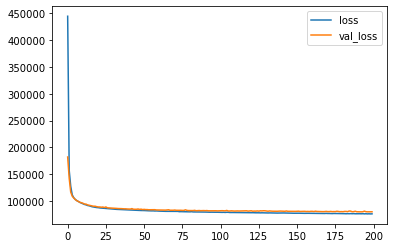

In [25]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [26]:
# predict using the test data 
predictions = model.predict(X_test)
# evaluate the model
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))

79560.78816849603
123394.89234975634


In [27]:
# calcuate the score
r2_score(y_test,predictions)

0.8211642687898169